In [4]:
from easygui.boxes.choice_box import make_list_or_none
import pandas as pd
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import easygui as gui
import tkinter as tk
from sklearn.model_selection import train_test_split
# from sklearn.pipeline import Pipeline
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler 
from sklearn.manifold import TSNE 

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,precision_recall_curve,precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn.feature_selection import VarianceThreshold
%matplotlib inline


Address data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
250 5


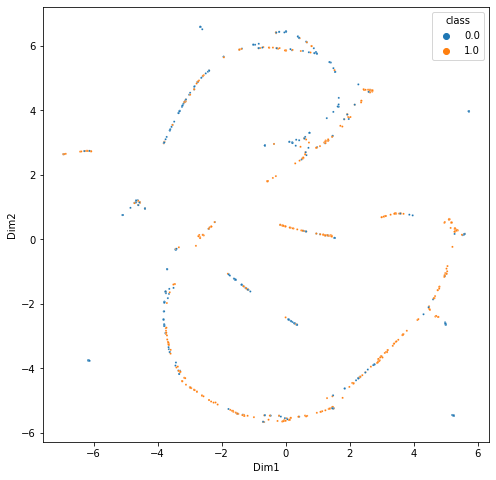

250 10


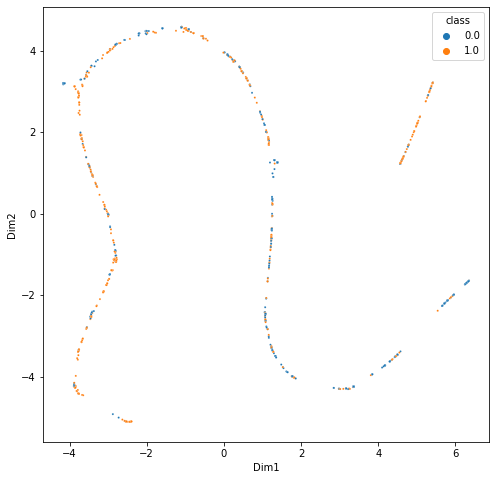

250 15


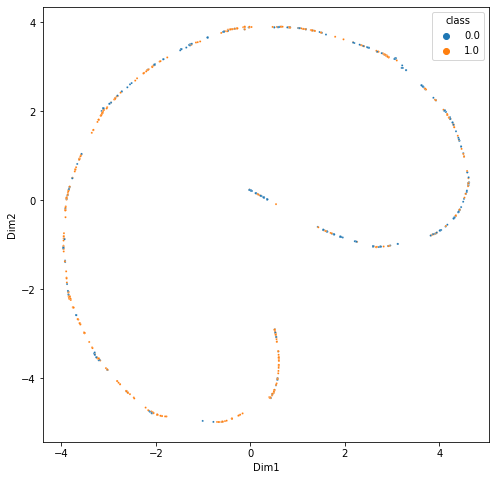

250 20


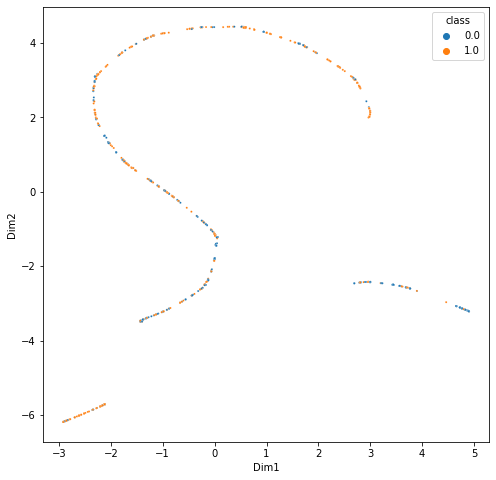

250 25


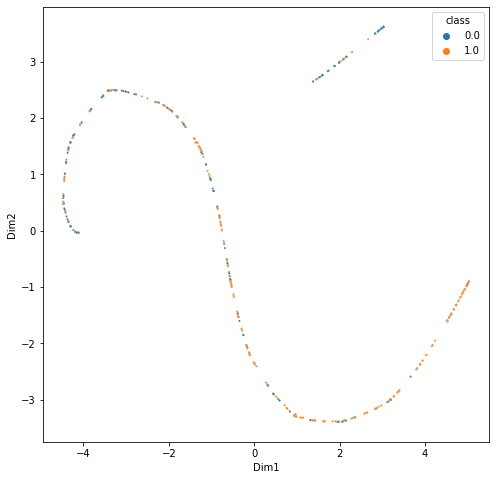

250 30


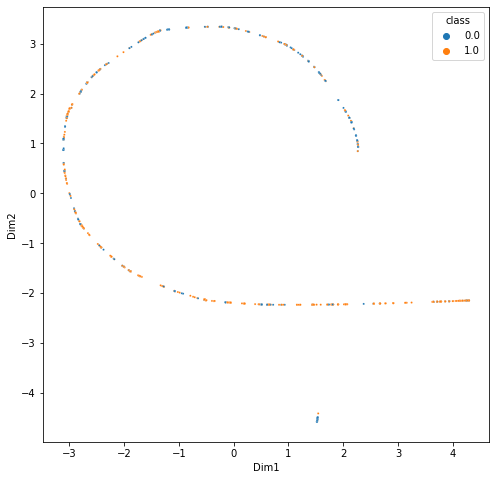

250 35


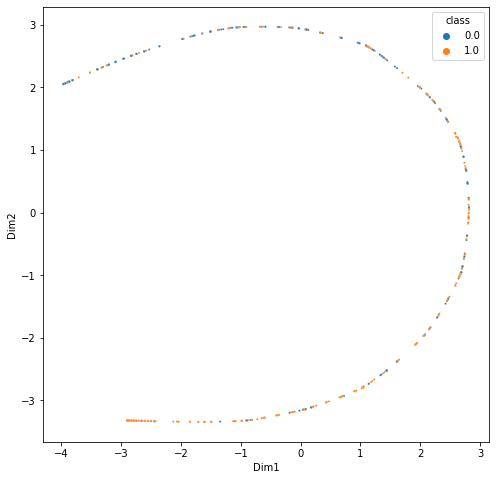

250 40


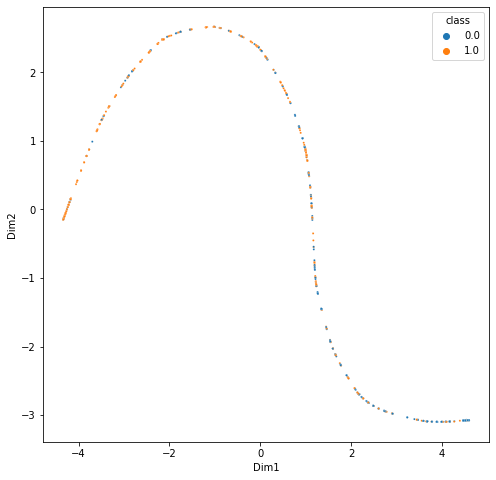

250 45


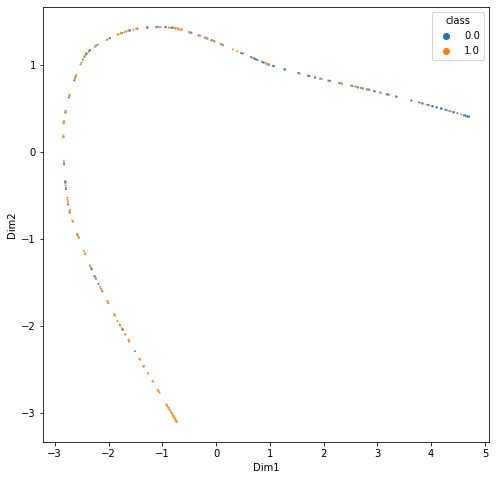

250 50


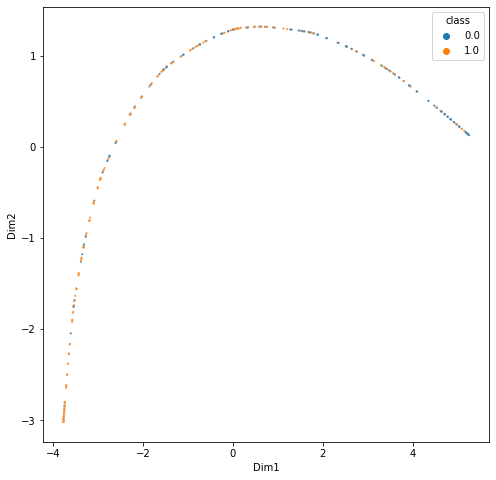

350 5


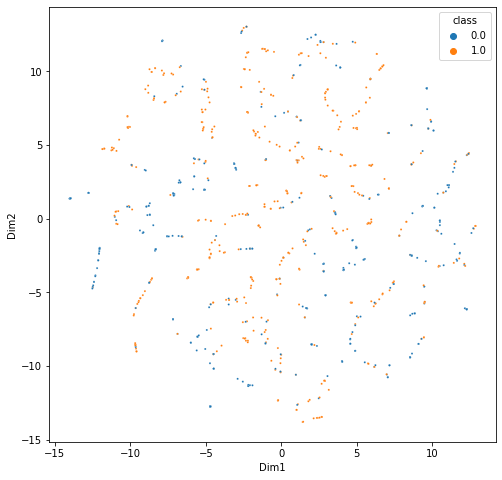

350 10


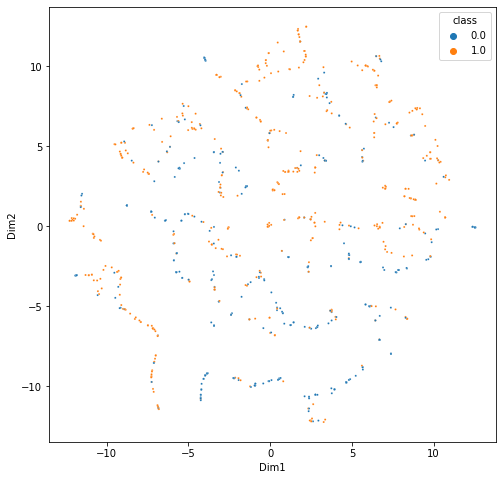

350 15


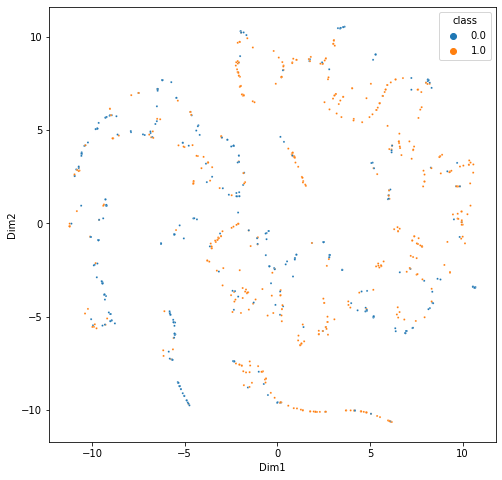

350 20


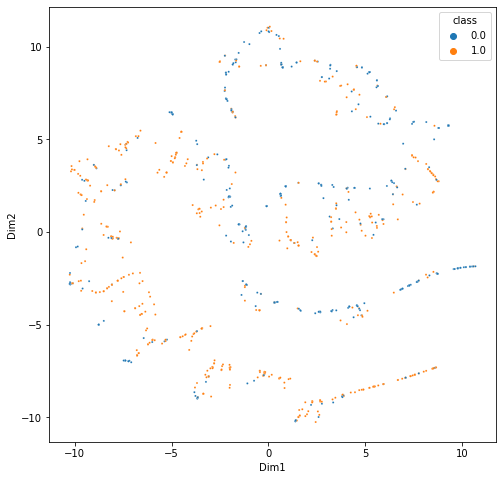

350 25


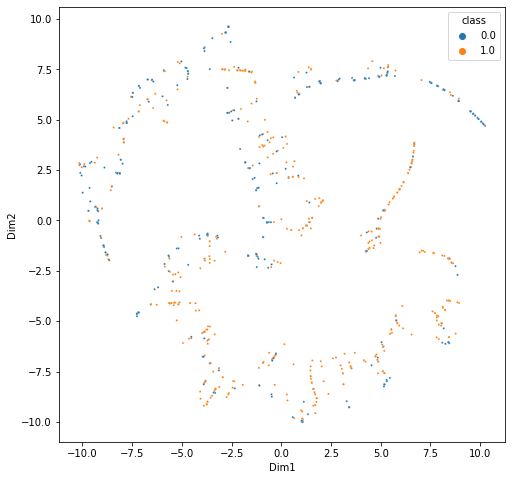

350 30


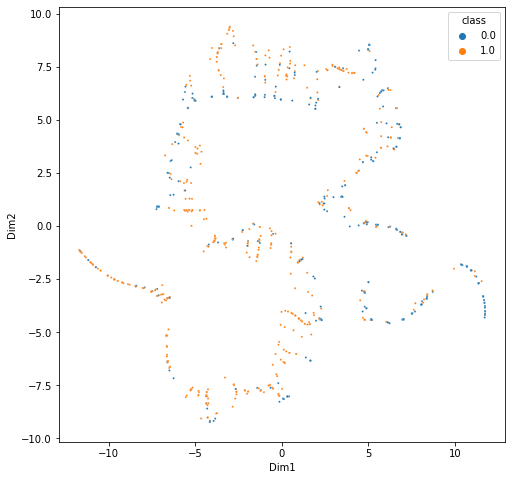

350 35


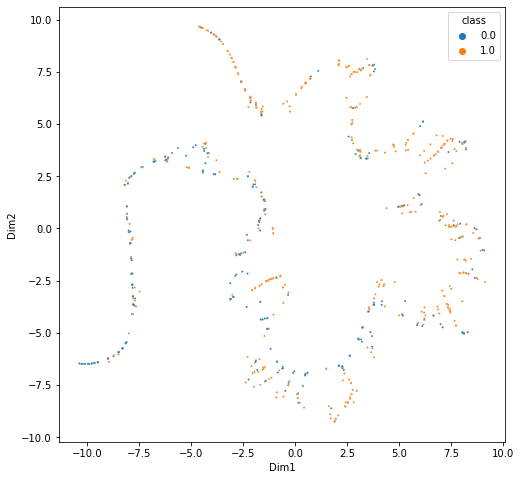

350 40


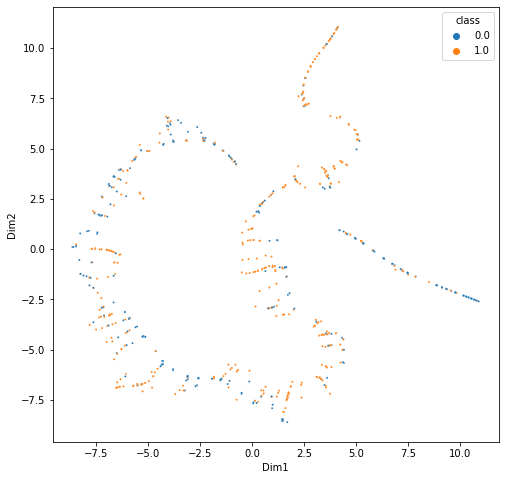

350 45


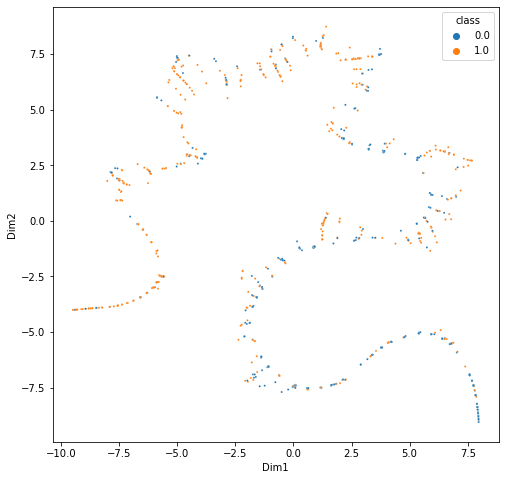

350 50


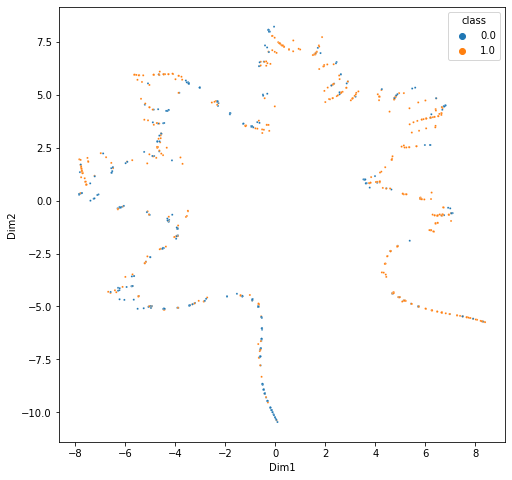

450 5


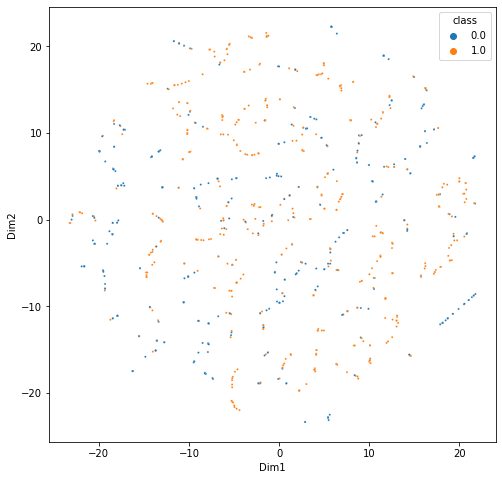

450 10


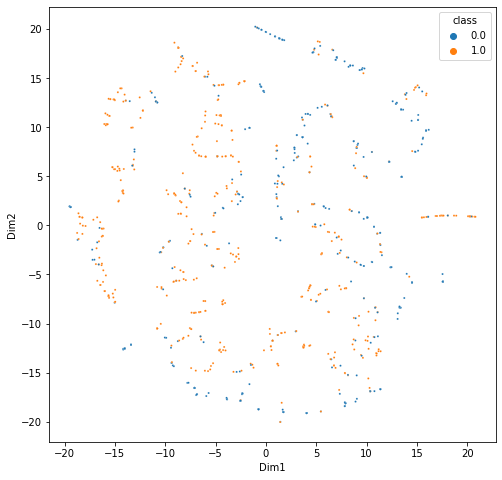

450 15


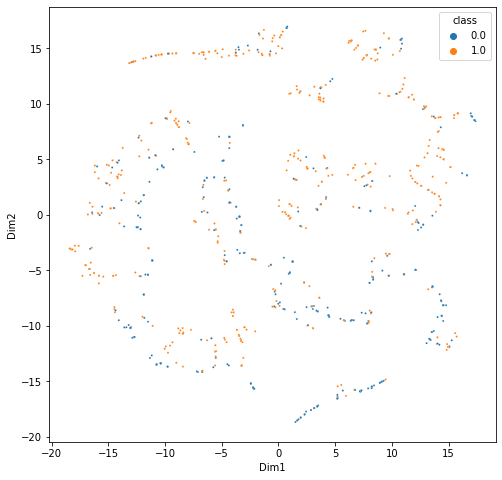

450 20


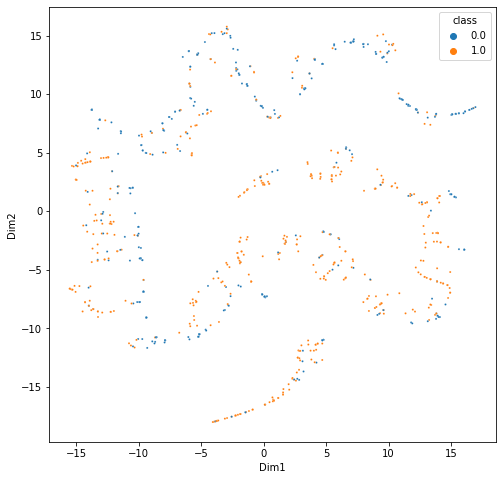

450 25


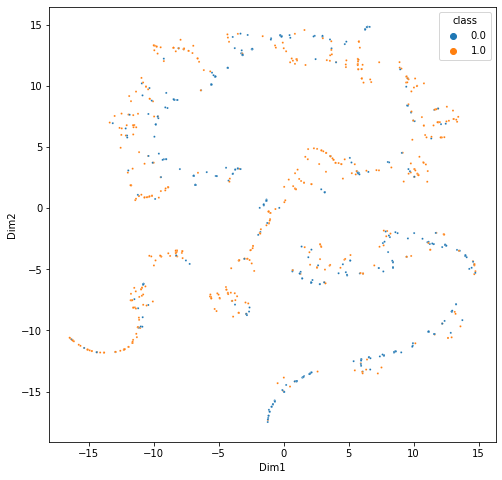

450 30


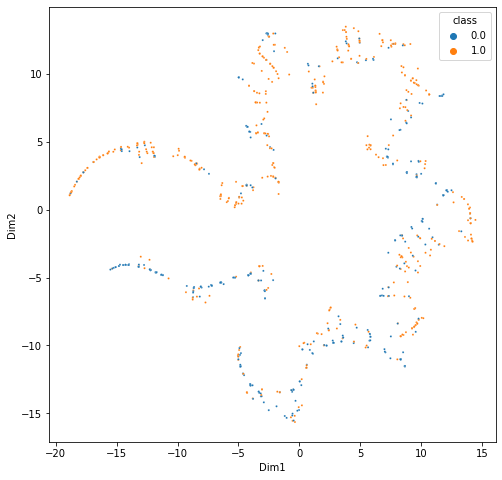

450 35


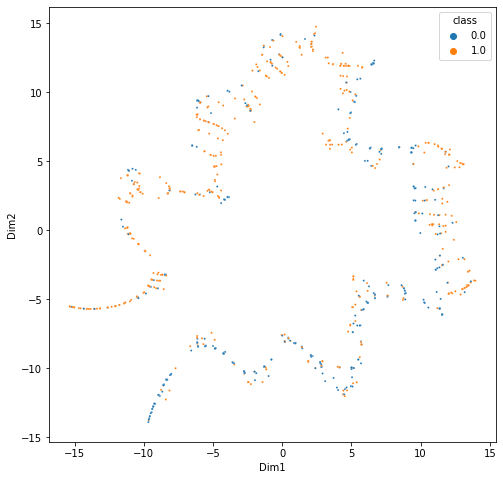

450 40


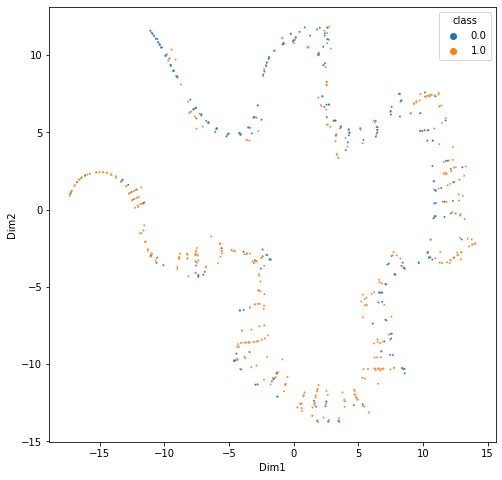

450 45


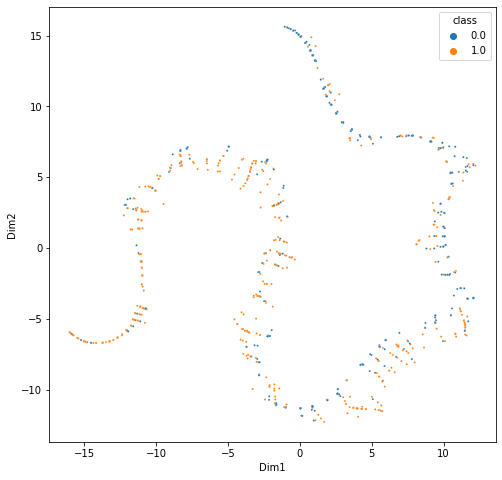

450 50


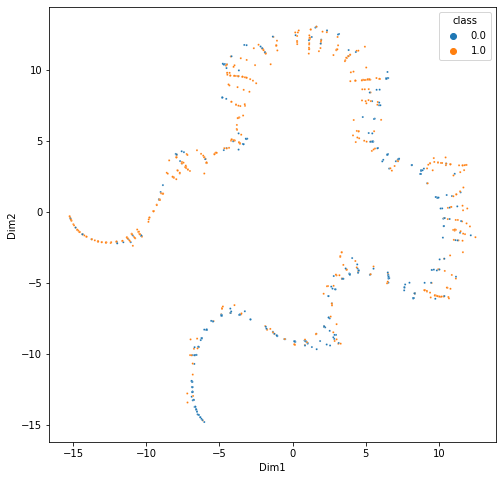

550 5


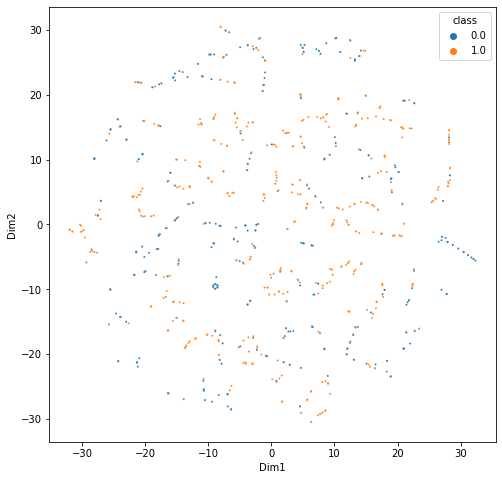

550 10


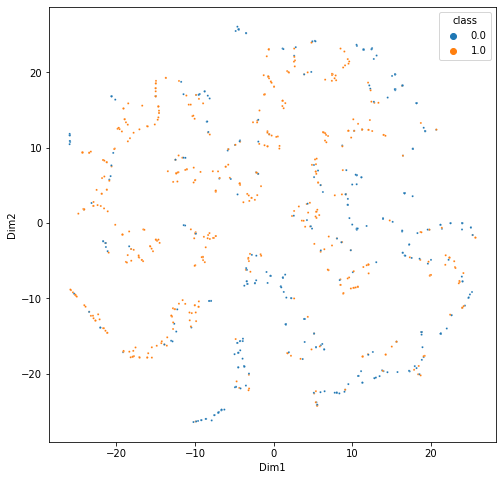

550 15


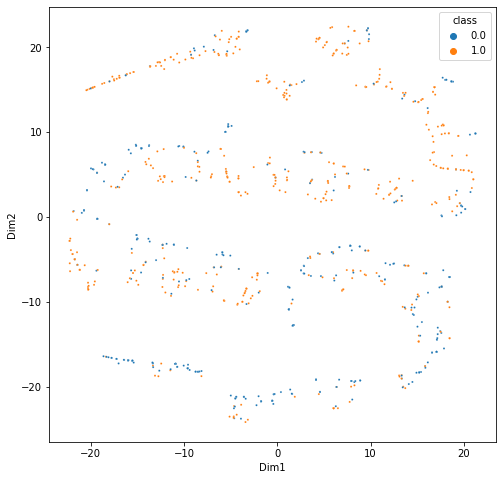

550 20


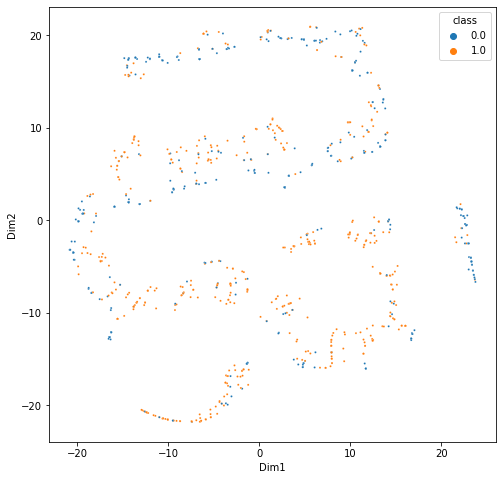

550 25


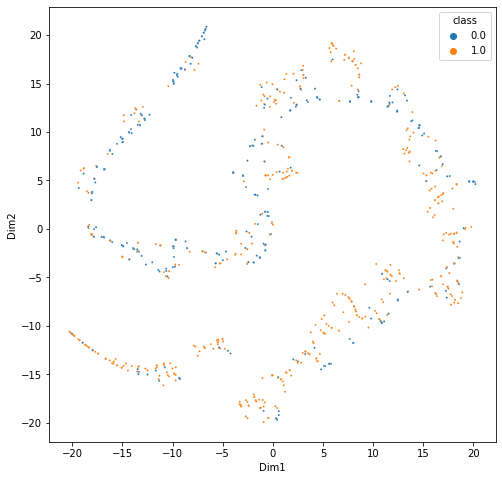

550 30


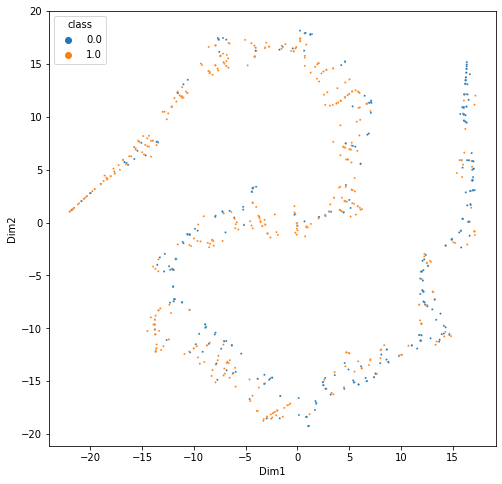

550 35


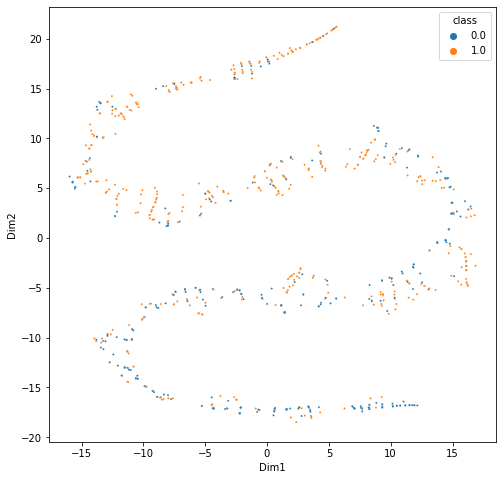

550 40


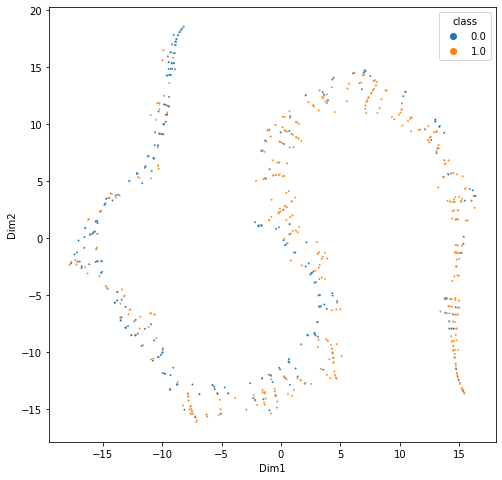

550 45


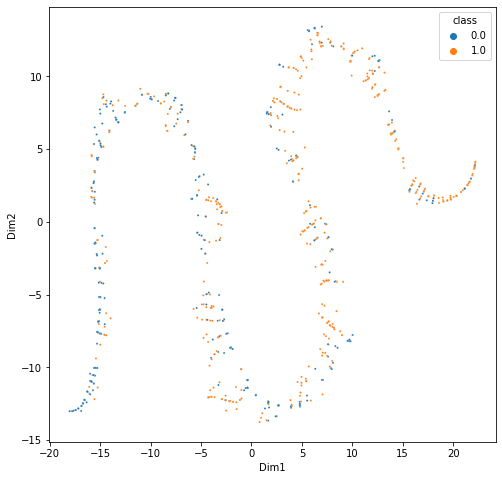

550 50


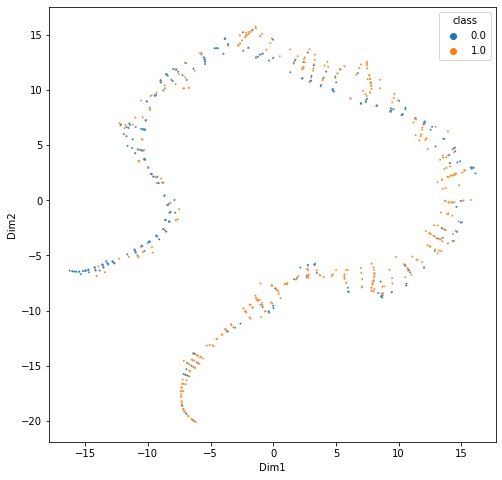

650 5


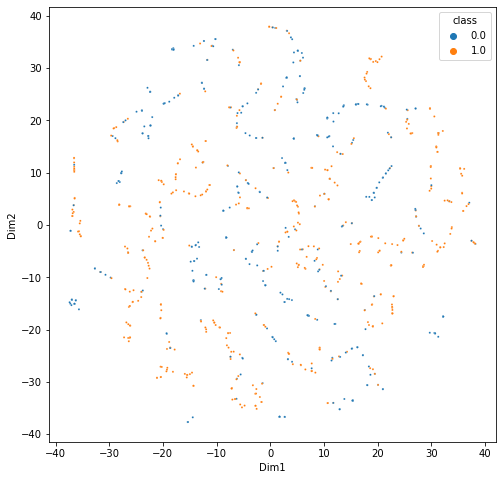

650 10


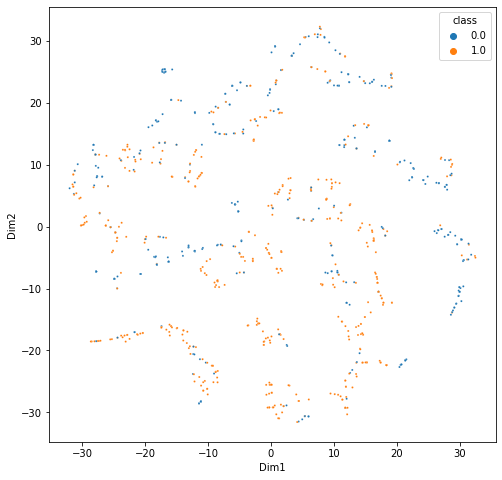

650 15


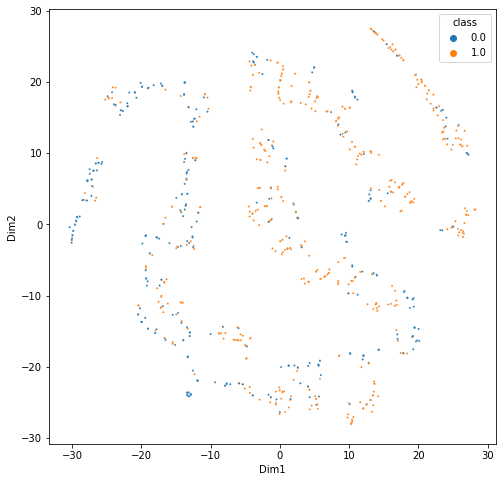

650 20


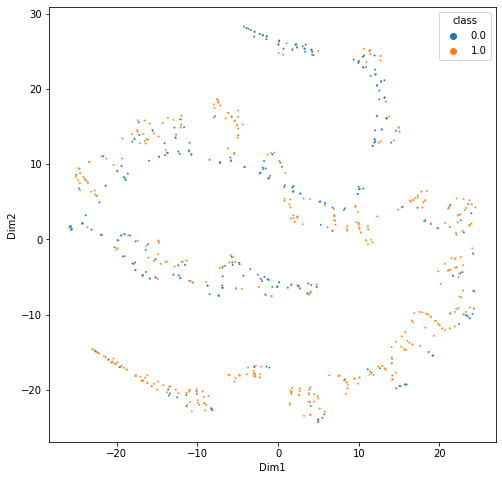

650 25


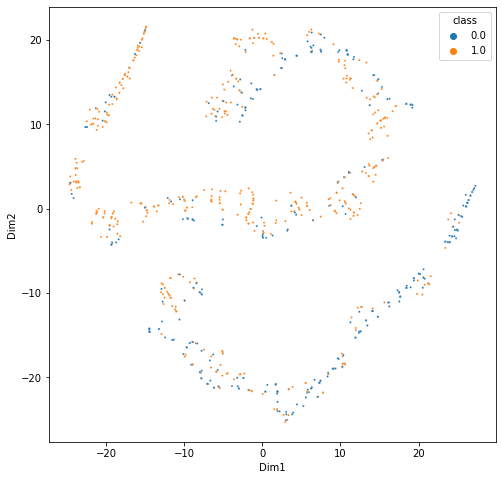

650 30


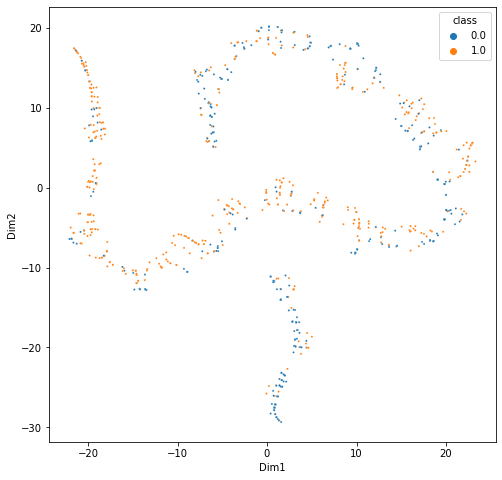

650 35


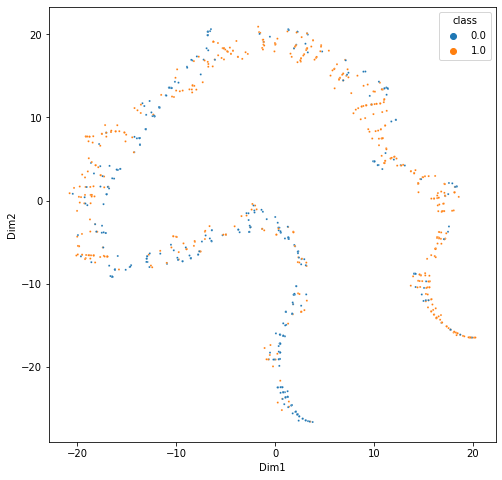

650 40


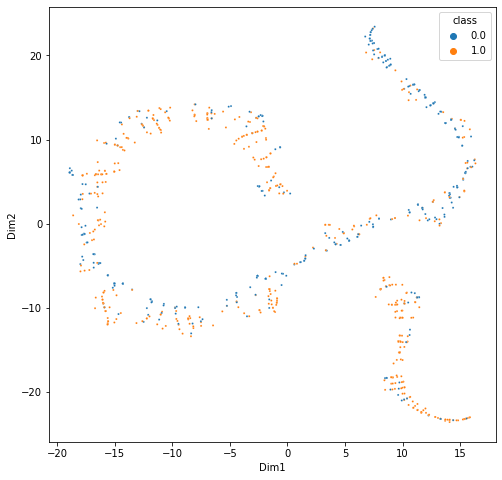

650 45


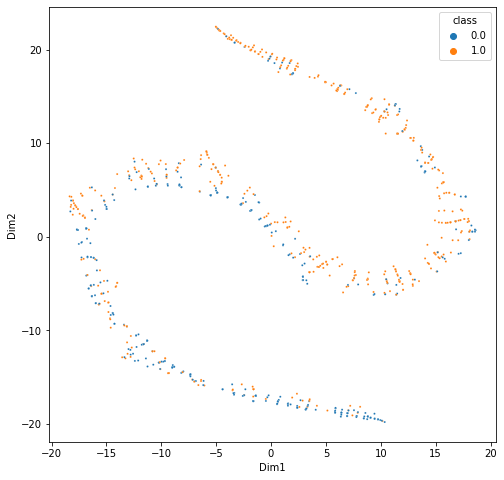

650 50


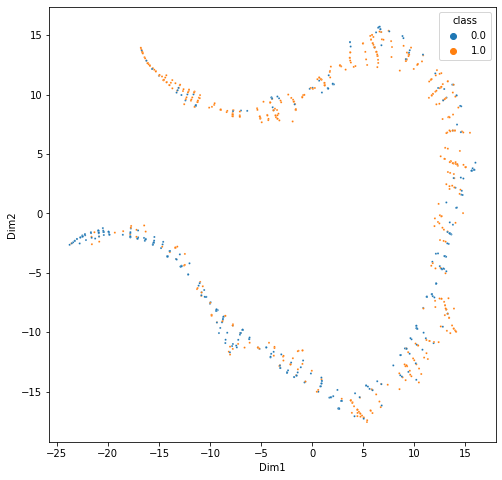

750 5


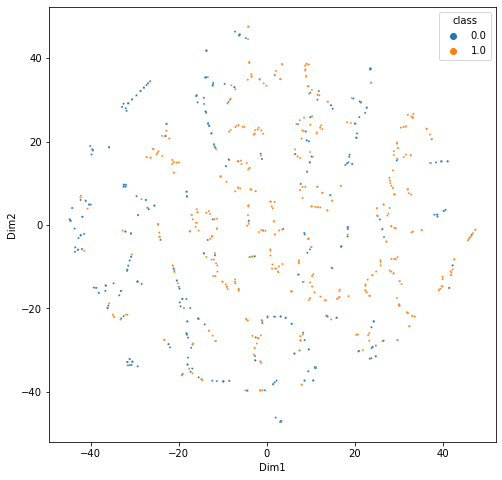

750 10


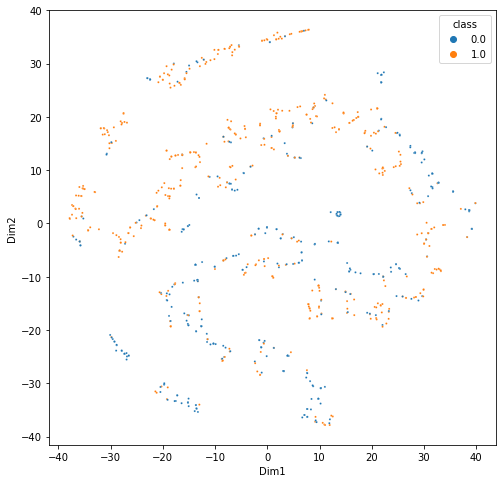

750 15


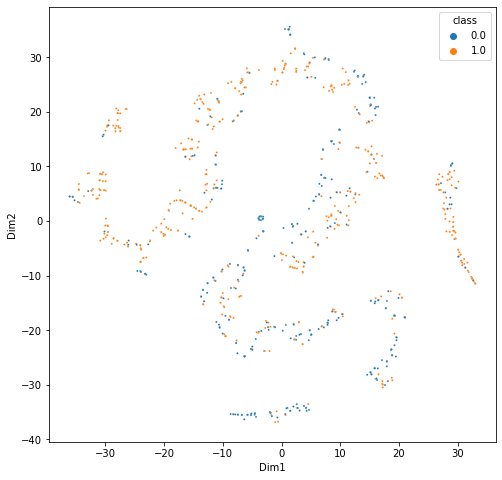

750 20


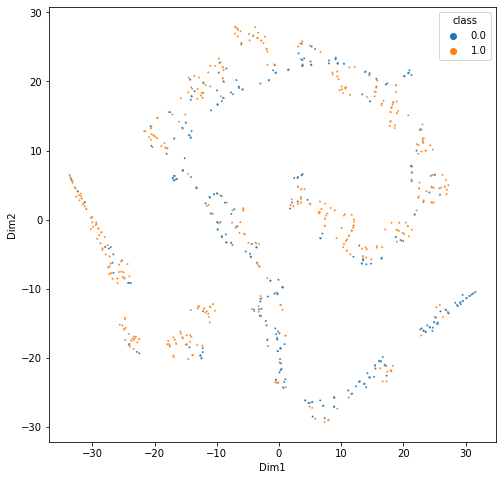

750 25


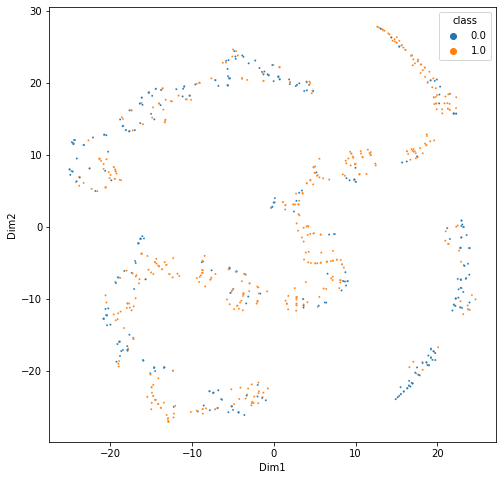

750 30


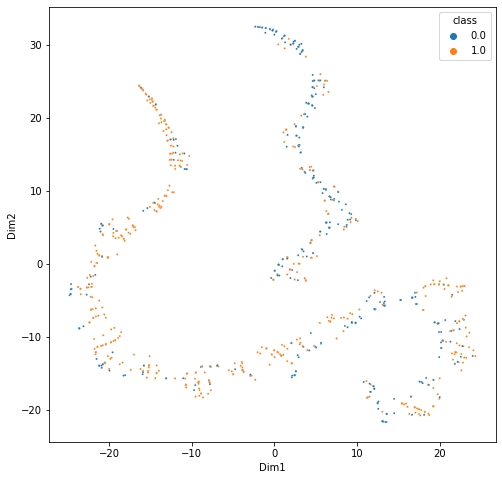

750 35


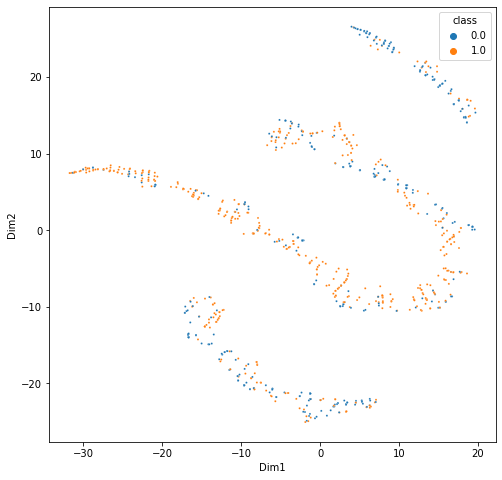

750 40


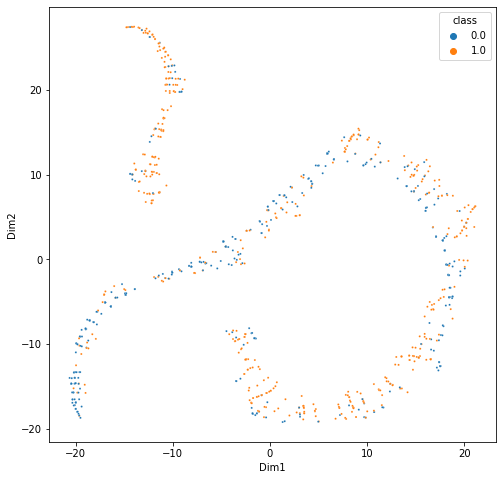

750 45


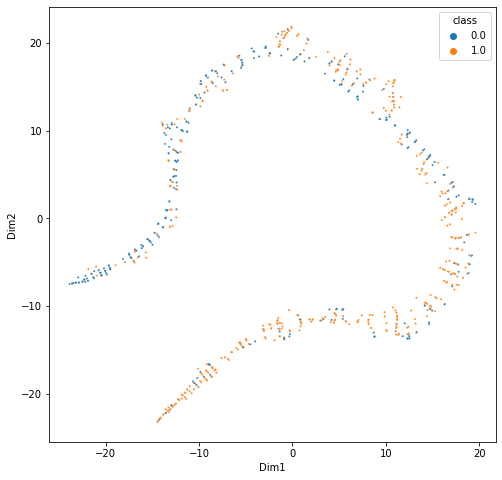

750 50


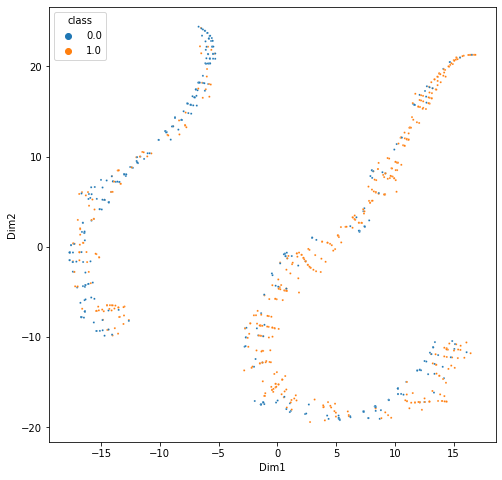

850 5


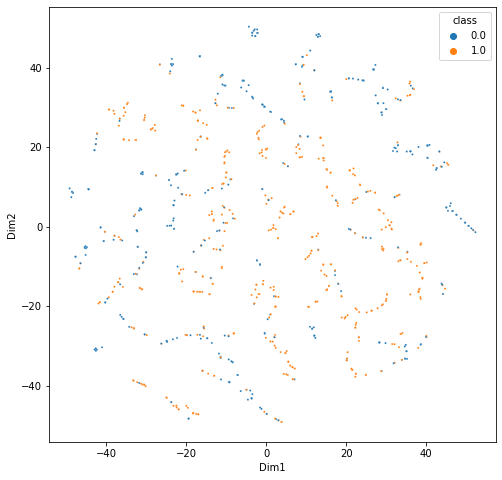

850 10


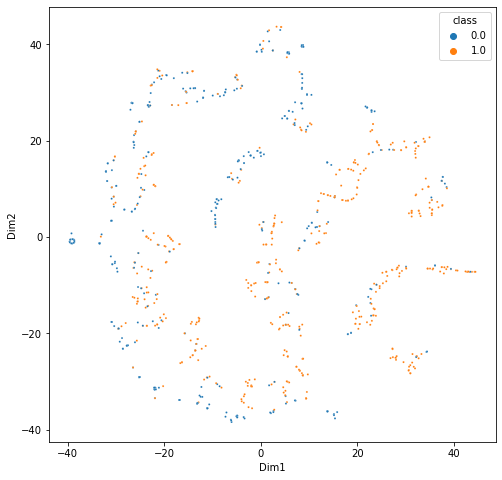

850 15


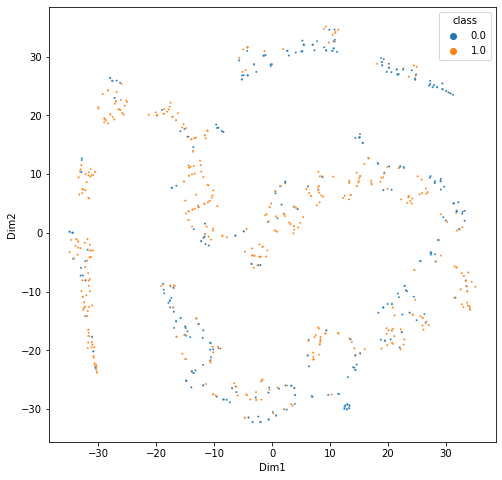

850 20


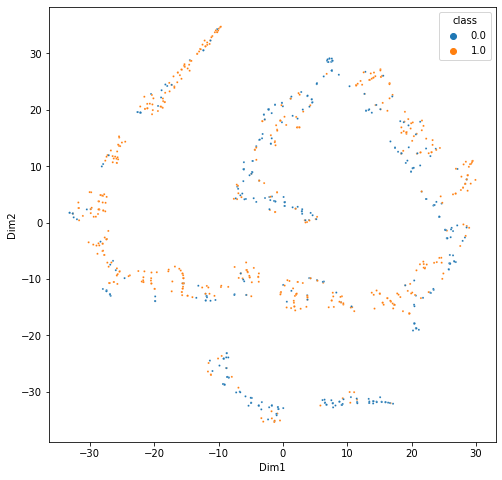

850 25


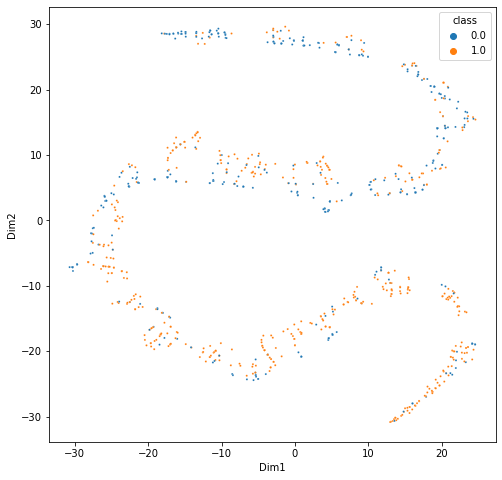

850 30


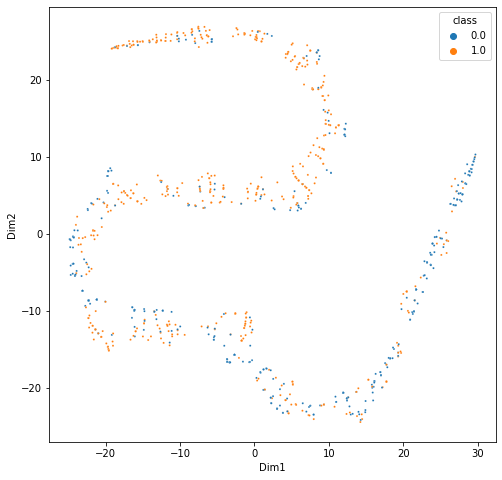

850 35


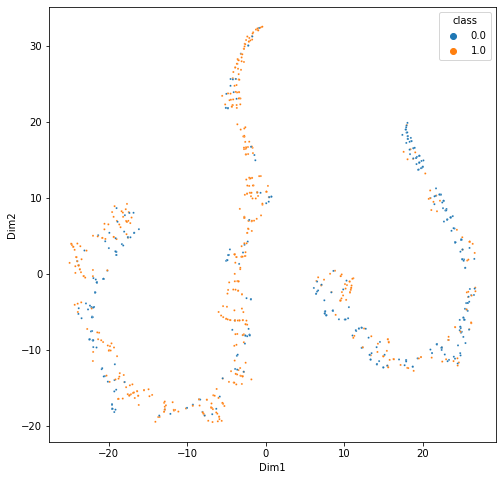

850 40


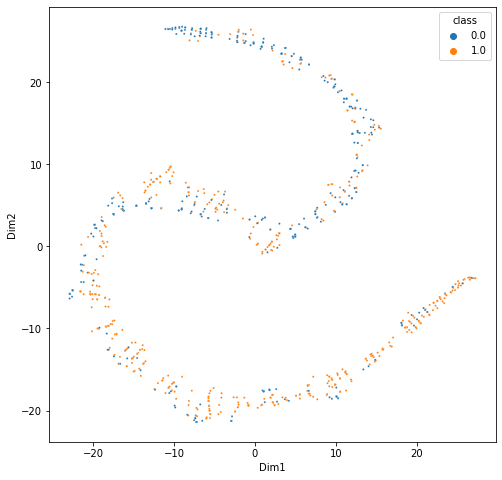

850 45


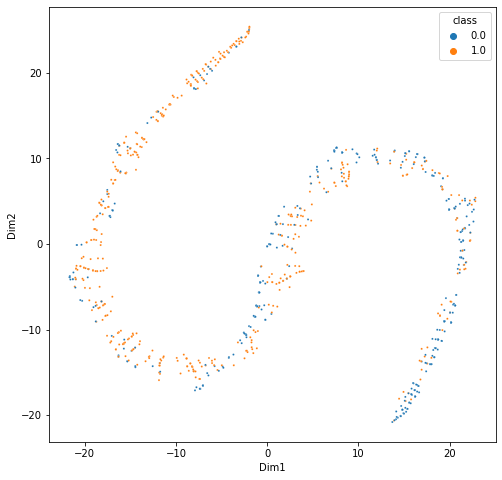

850 50


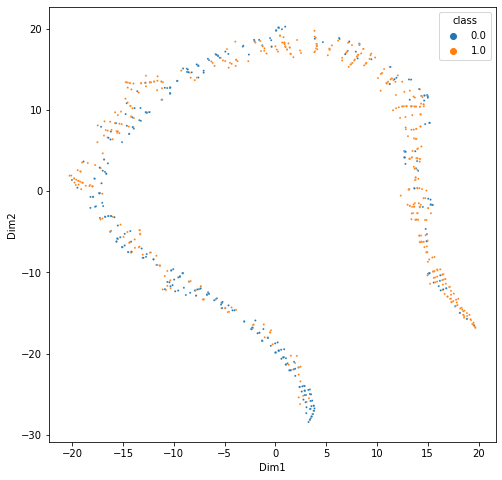

950 5


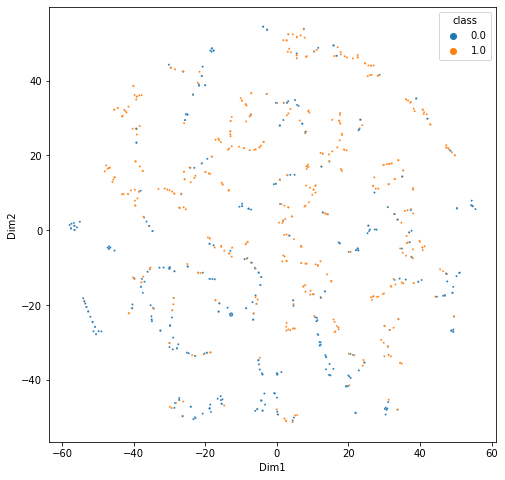

950 10


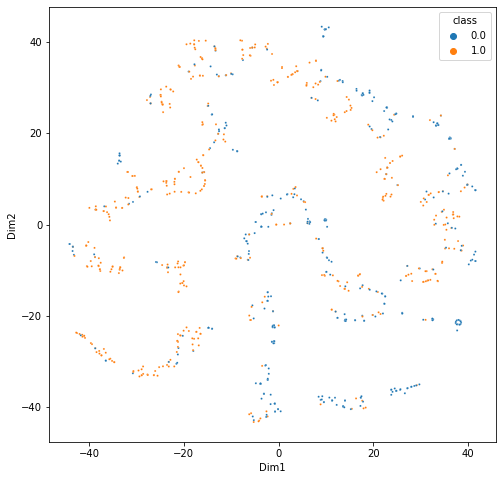

950 15


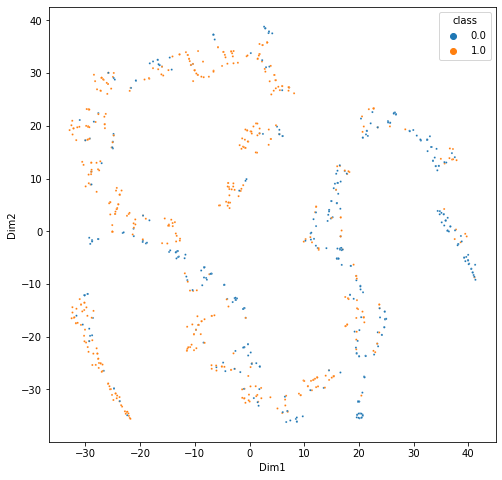

950 20


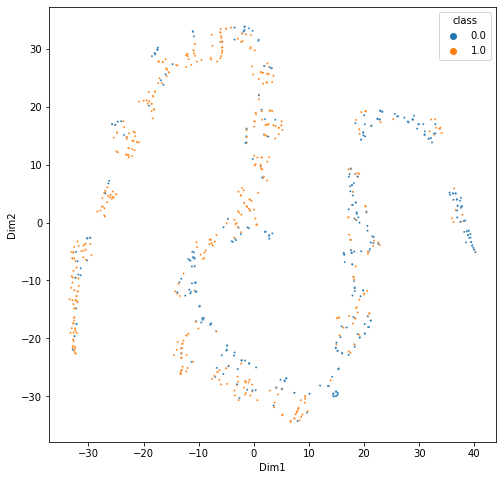

950 25


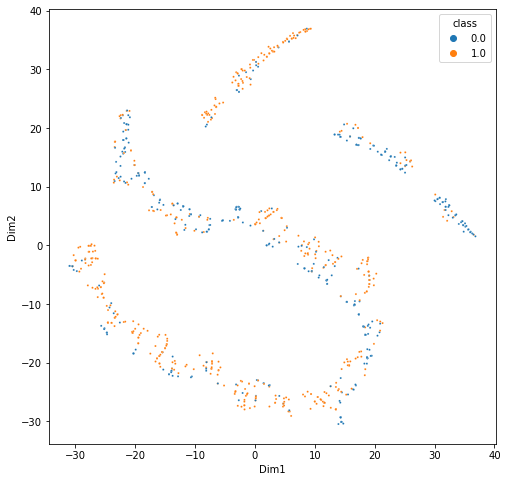

950 30


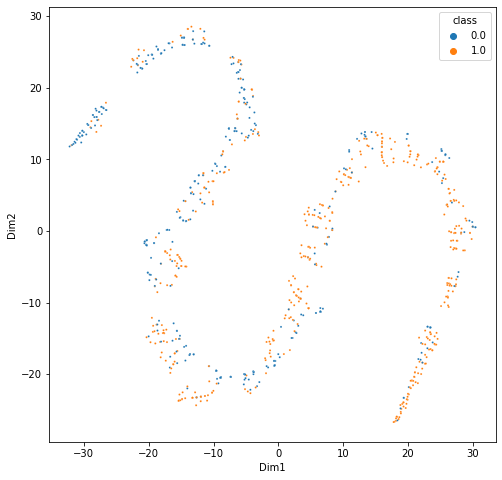

950 35


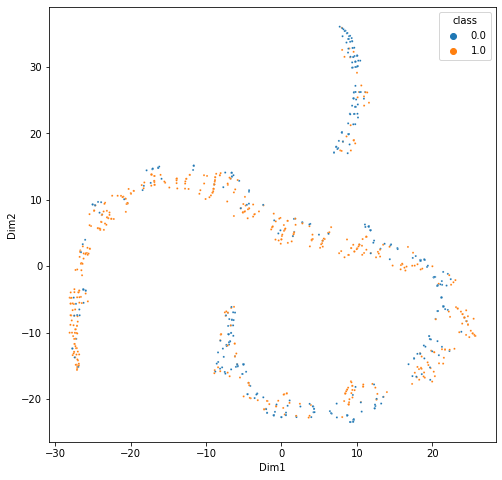

950 40


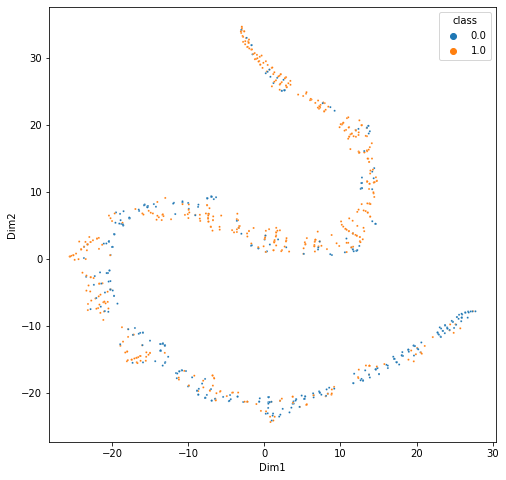

950 45


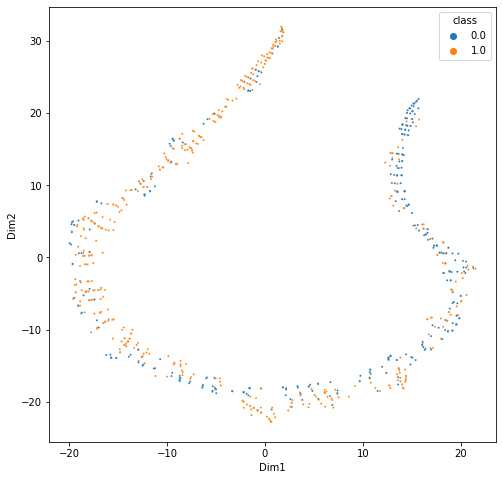

950 50


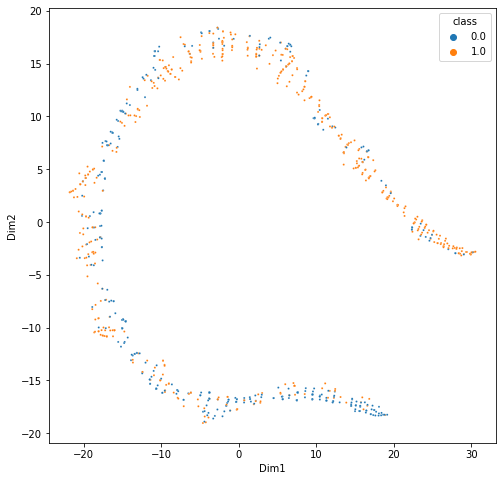

1050 5


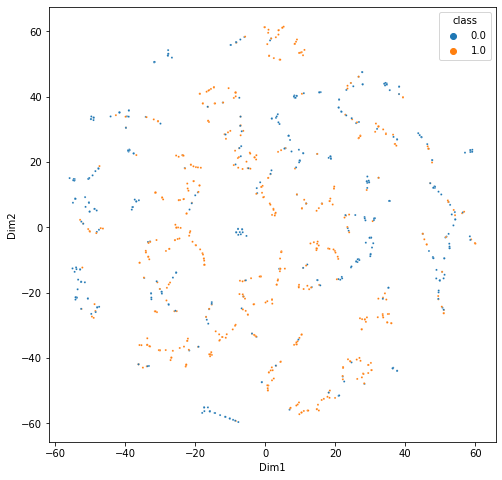

1050 10


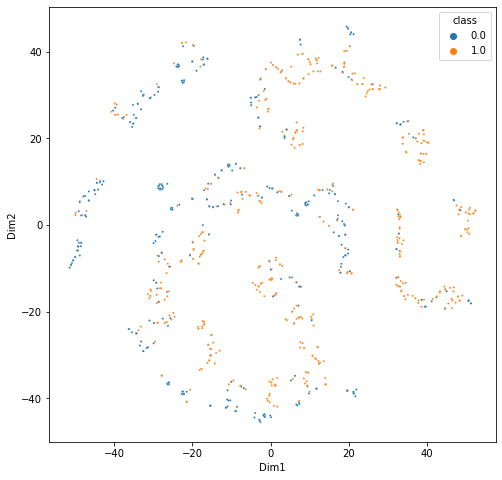

1050 15


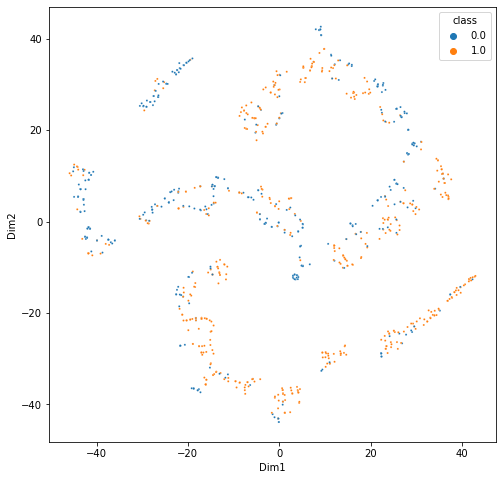

1050 20


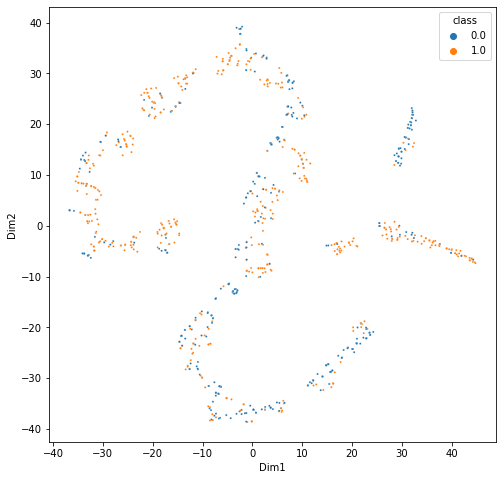

1050 25


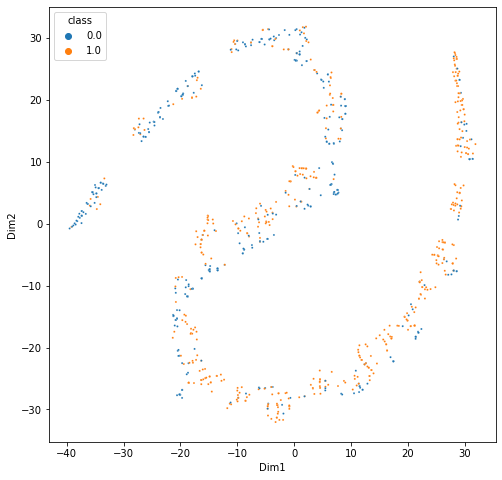

1050 30


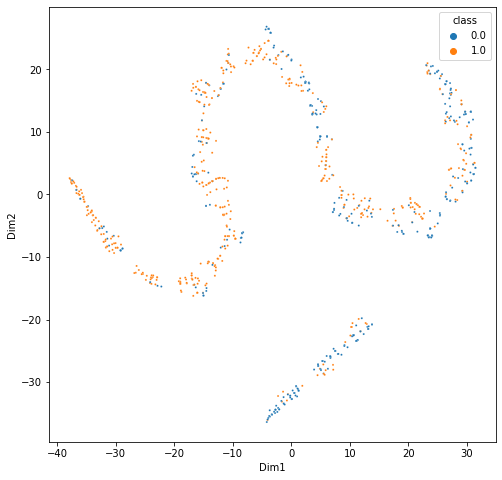

1050 35


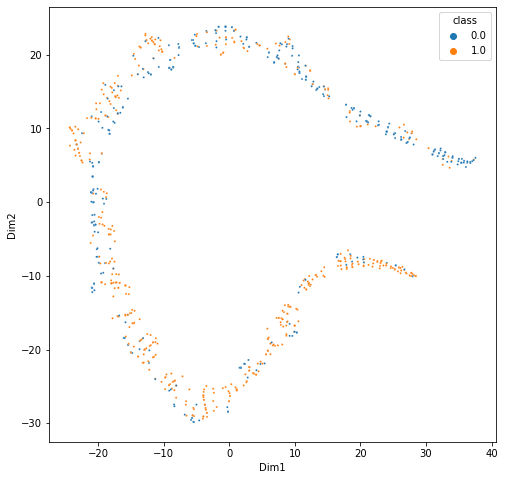

1050 40


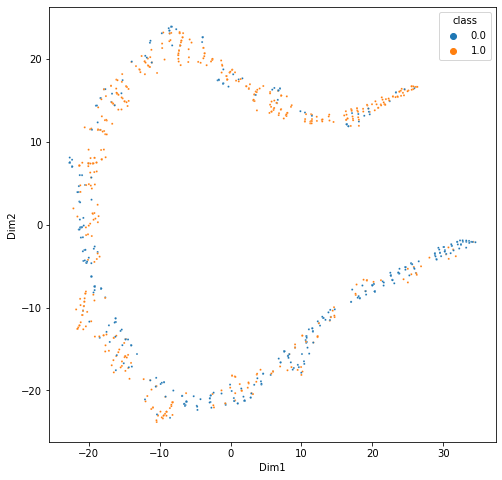

1050 45


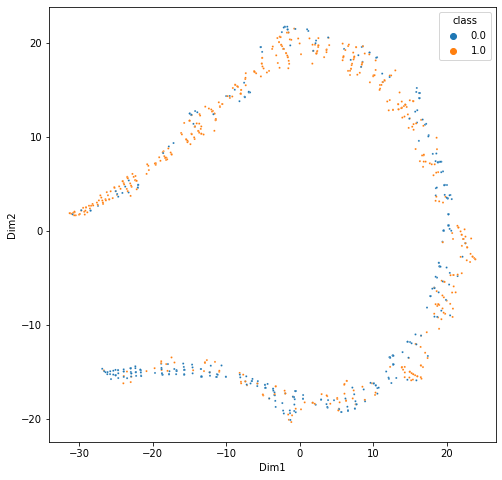

1050 50


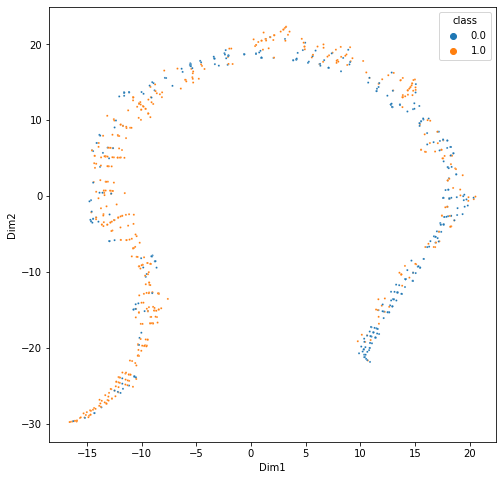

1150 5


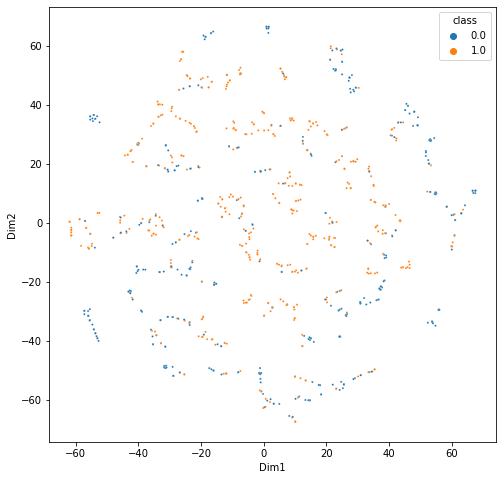

1150 10


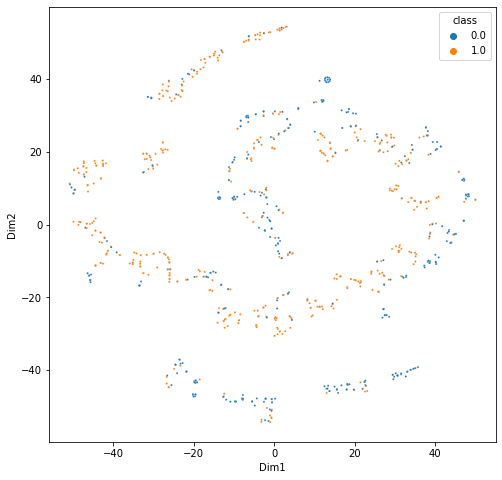

1150 15


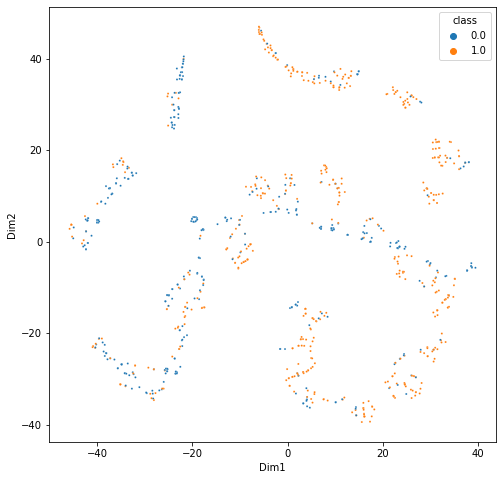

1150 20


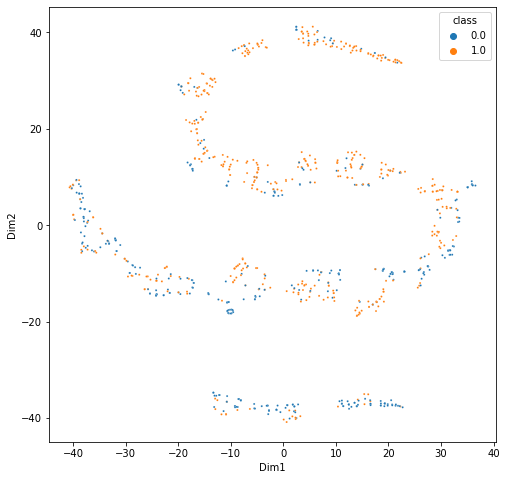

1150 25


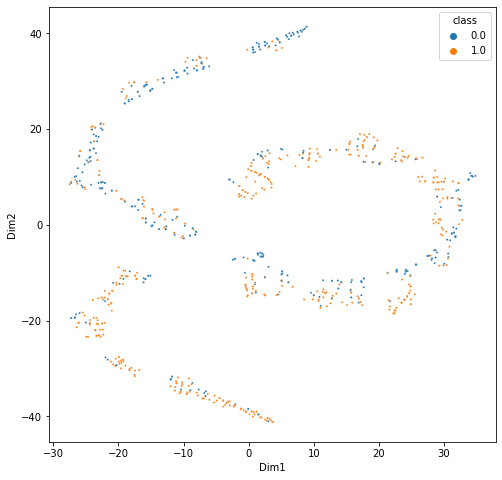

1150 30


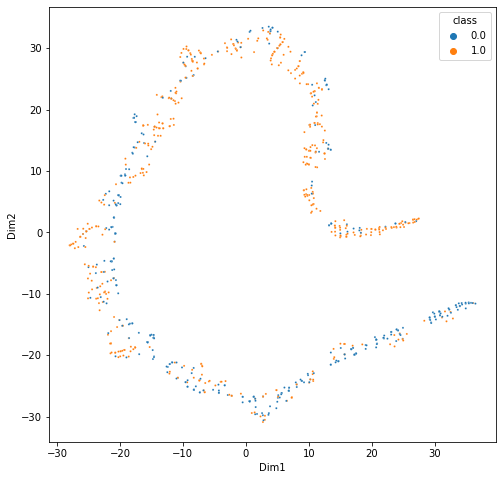

1150 35


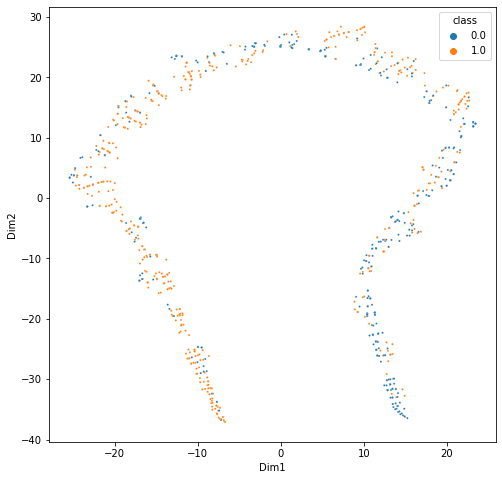

1150 40


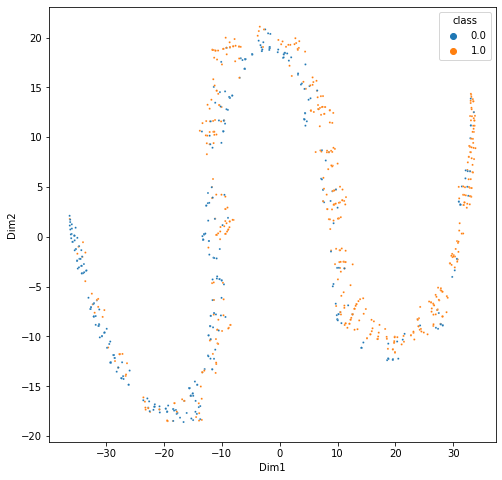

1150 45


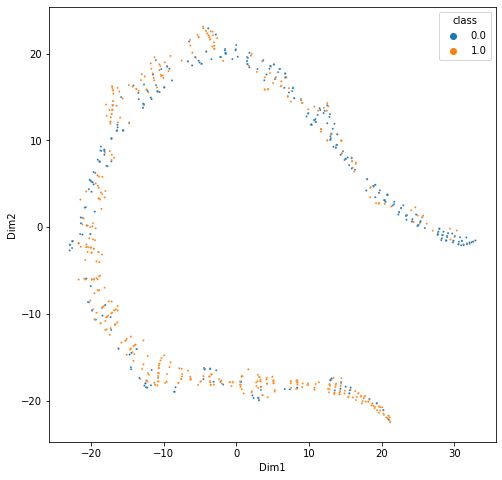

1150 50


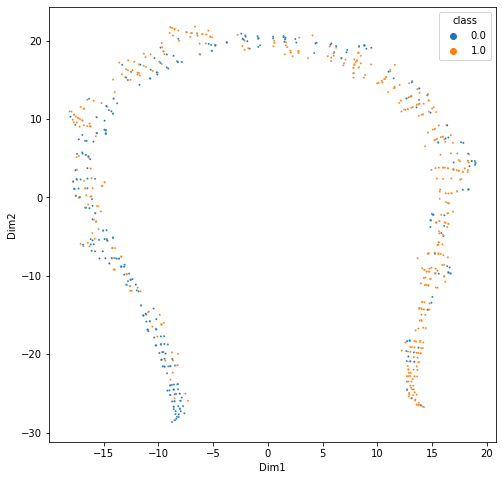

1250 5


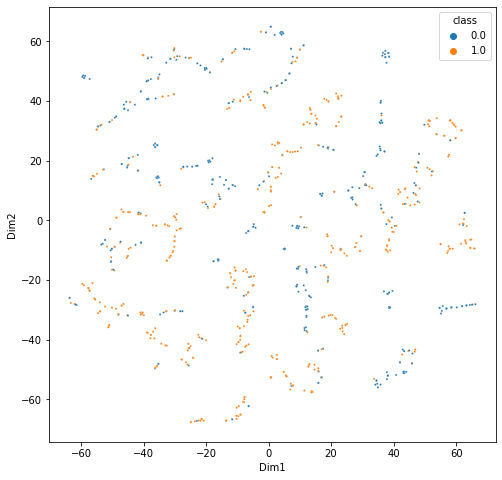

1250 10


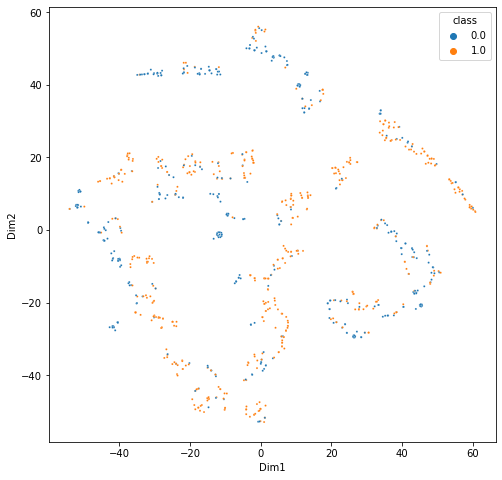

1250 15


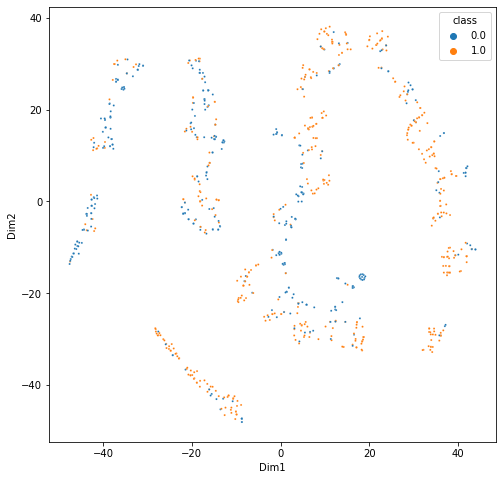

1250 20


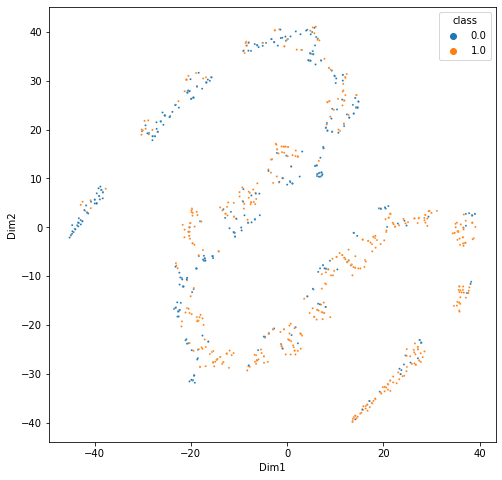

1250 25


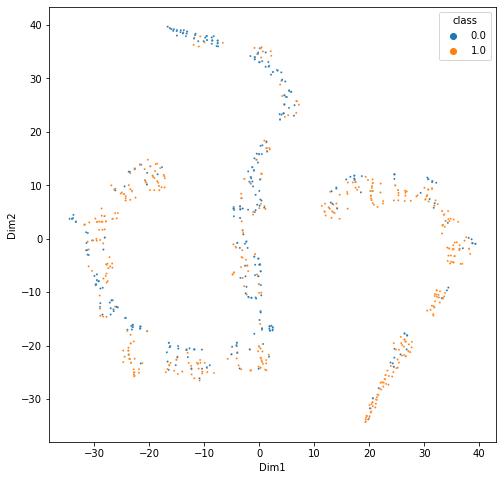

1250 30


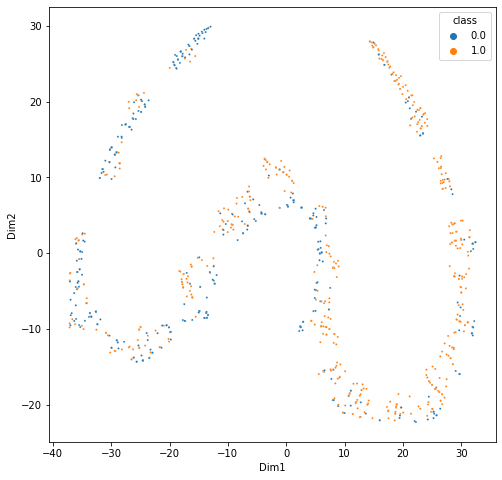

1250 35


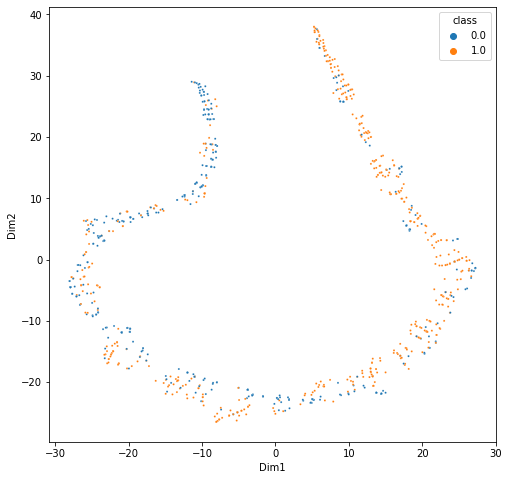

1250 40


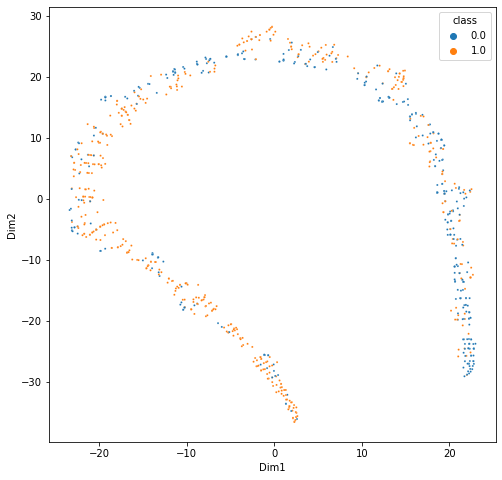

1250 45


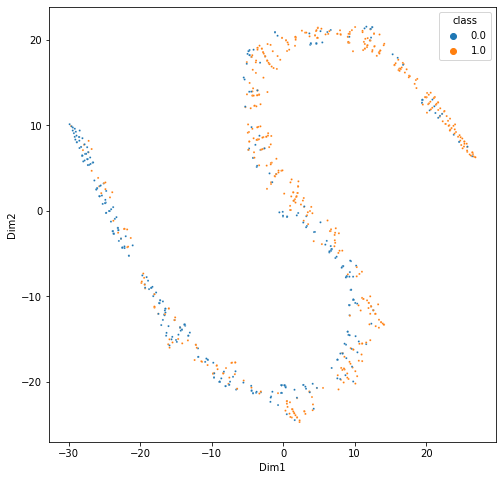

1250 50


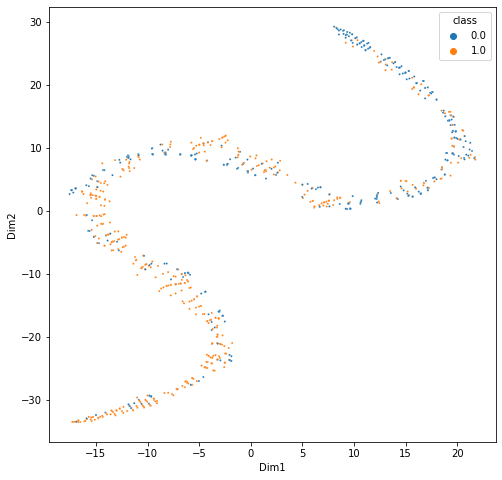

1350 5


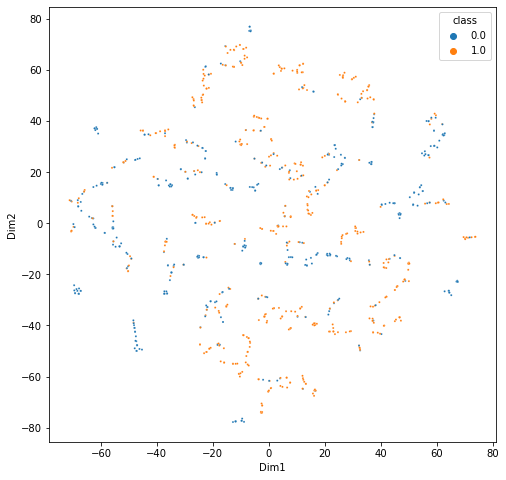

1350 10


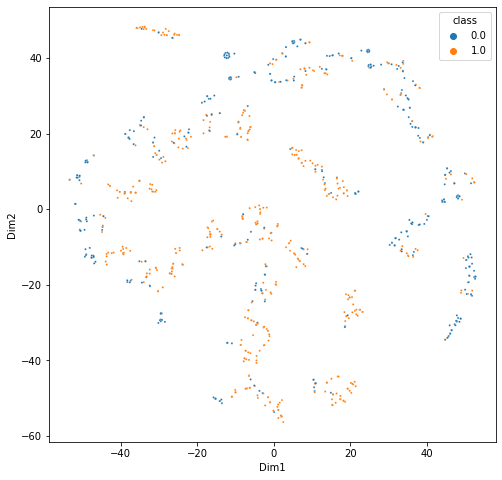

1350 15


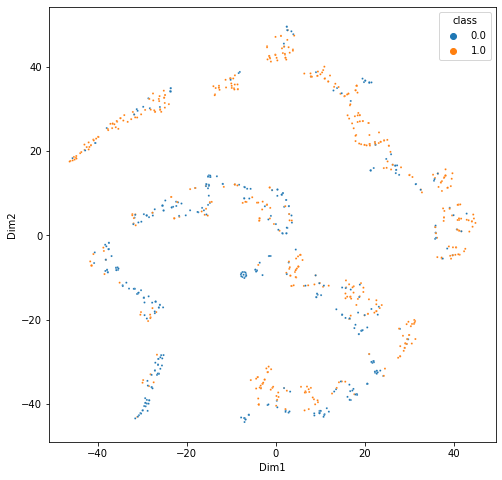

1350 20


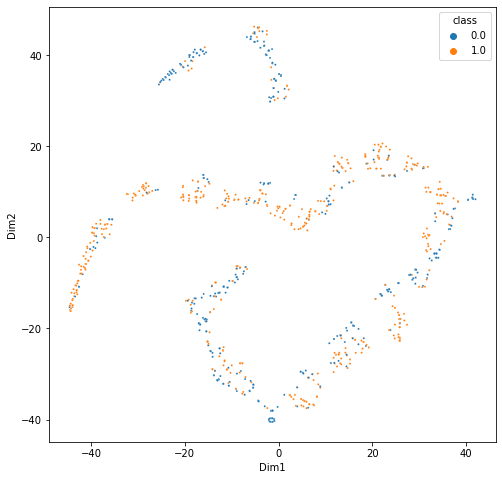

1350 25


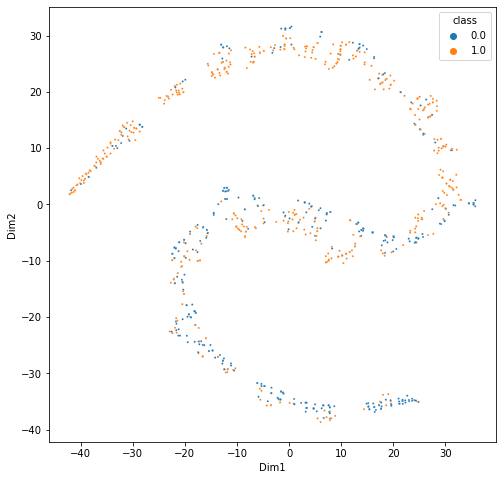

1350 30


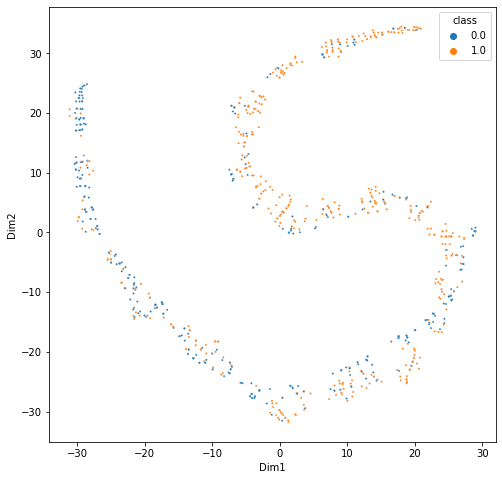

1350 35


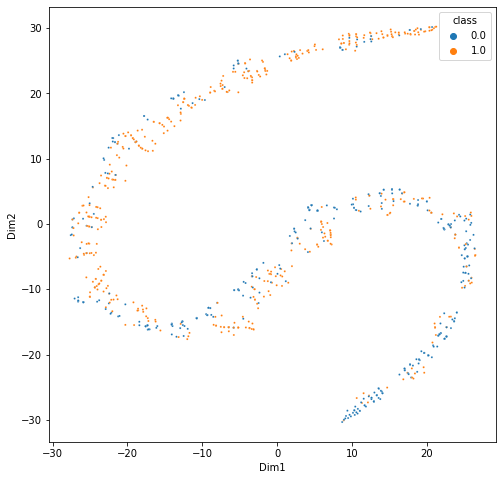

1350 40


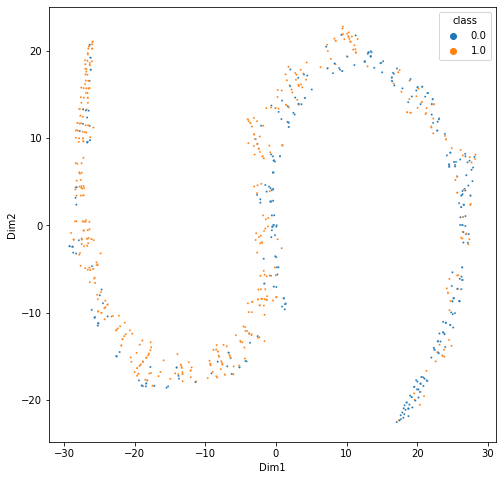

1350 45


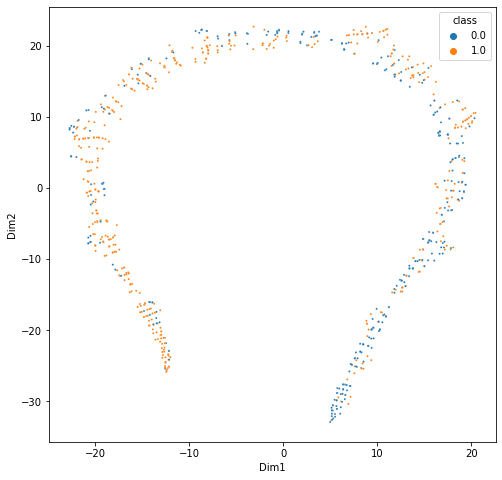

1350 50


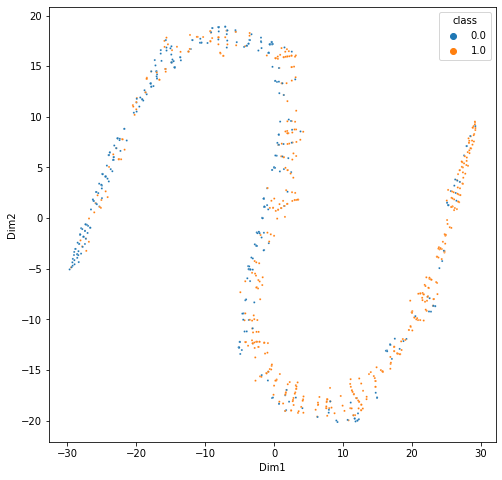

1450 5


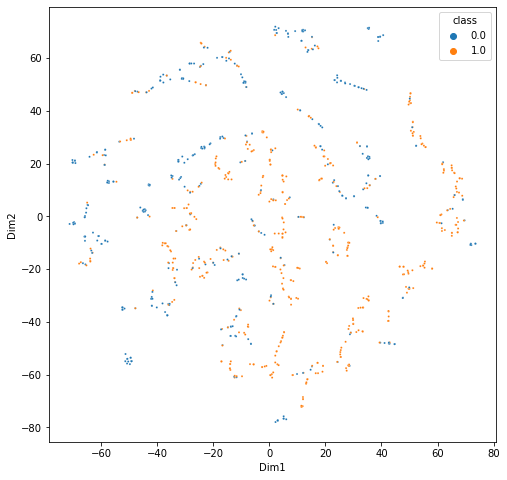

1450 10


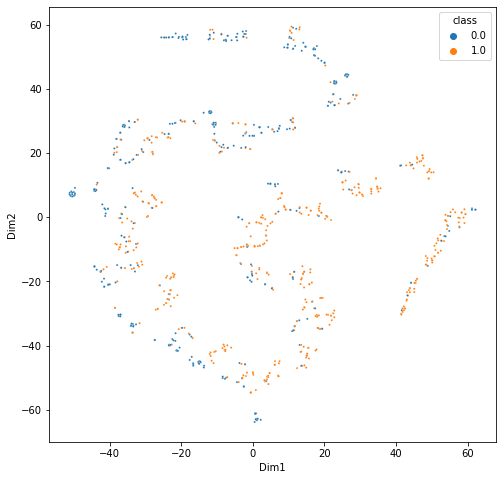

1450 15


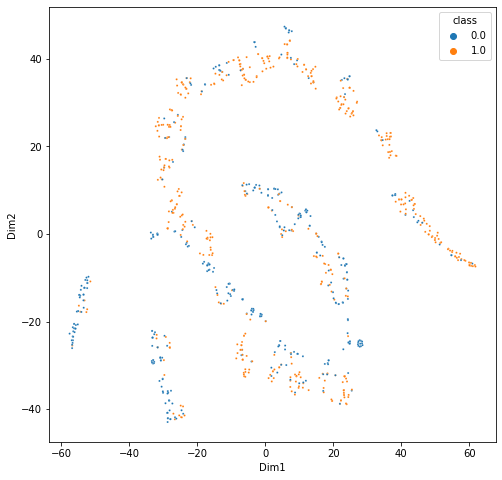

1450 20


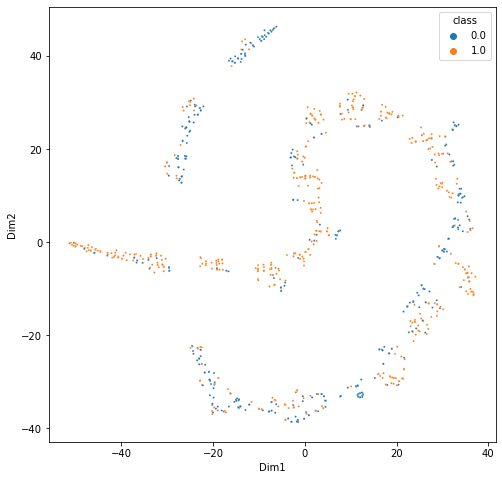

1450 25


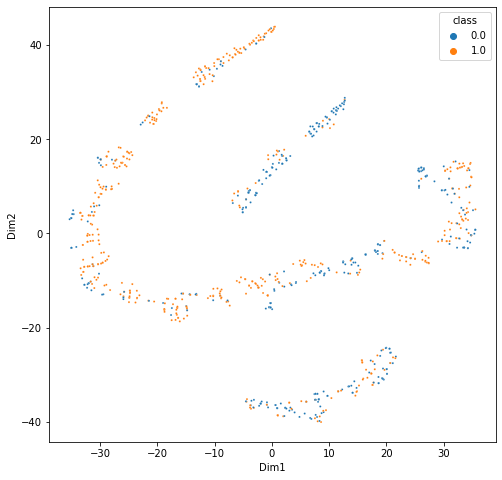

1450 30


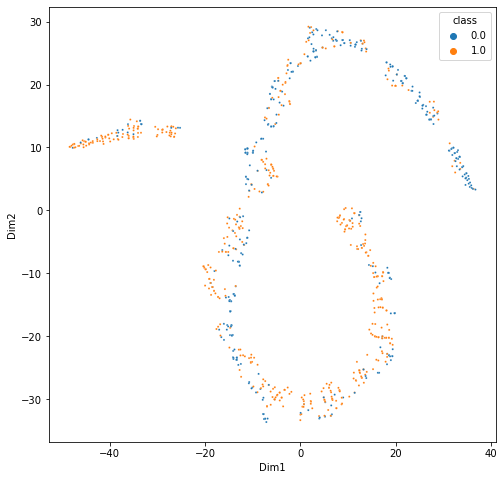

1450 35


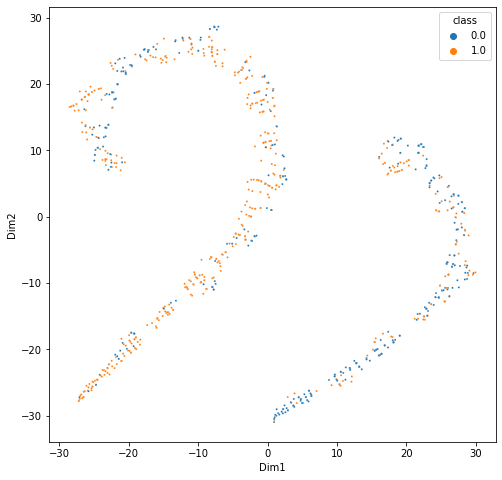

1450 40


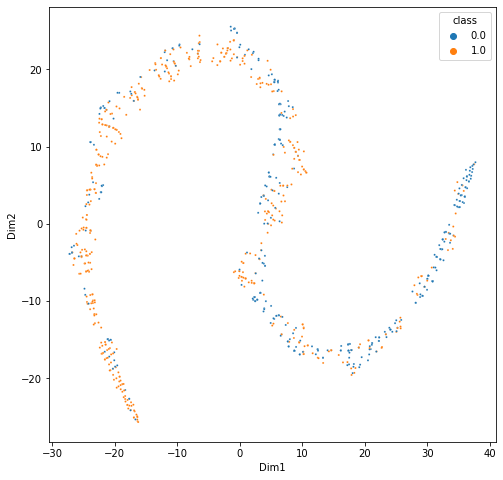

1450 45


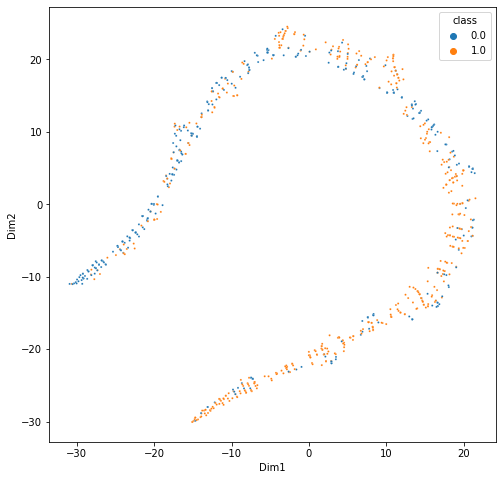

1450 50


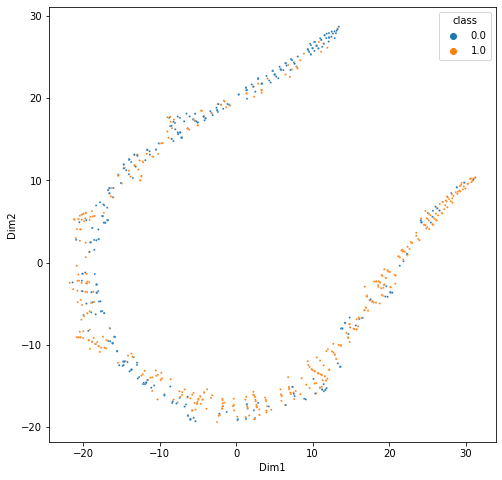

1550 5


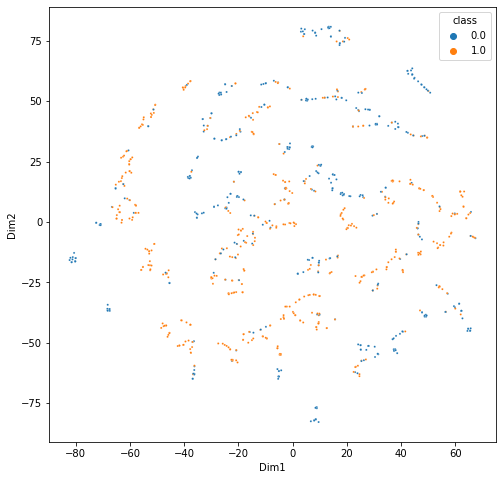

1550 10


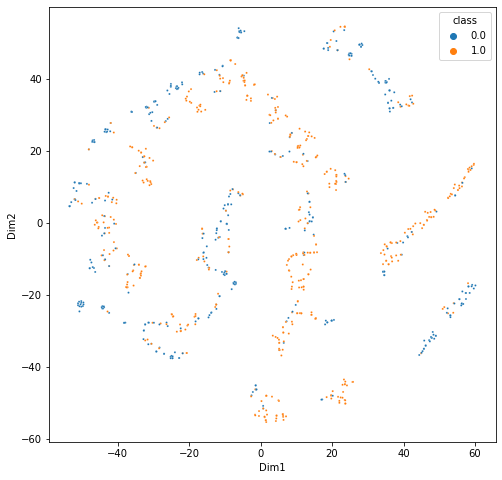

1550 15


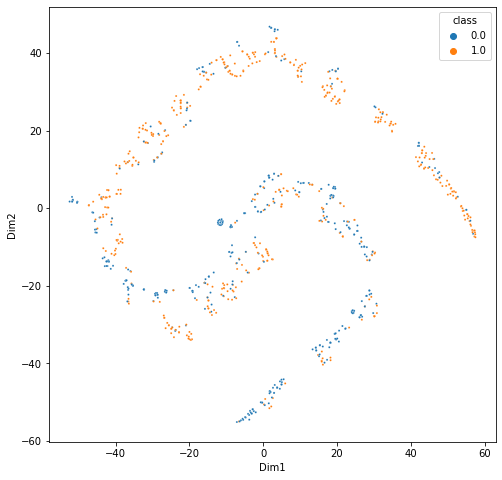

1550 20


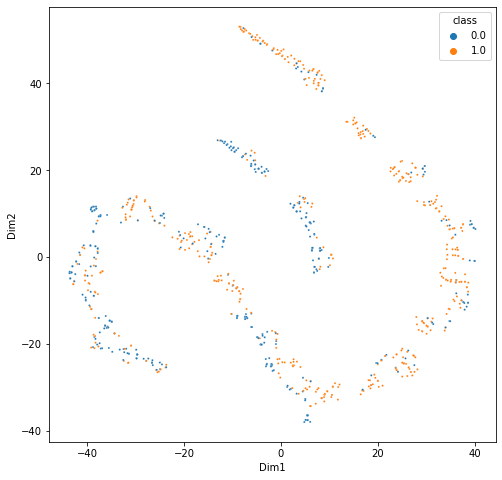

1550 25


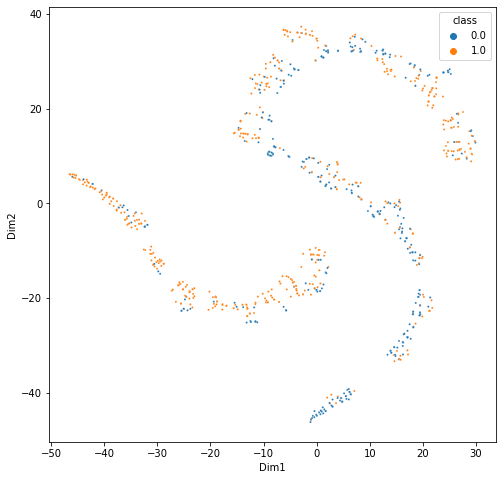

1550 30


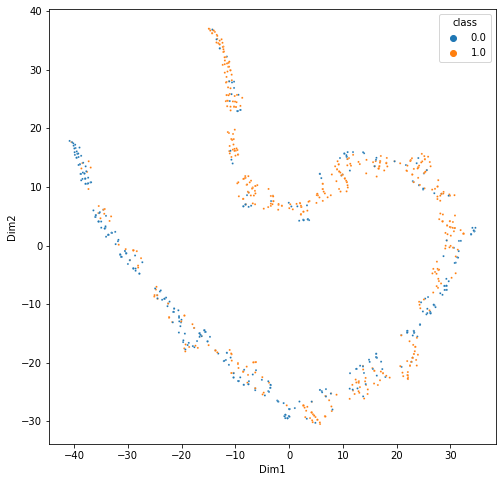

1550 35


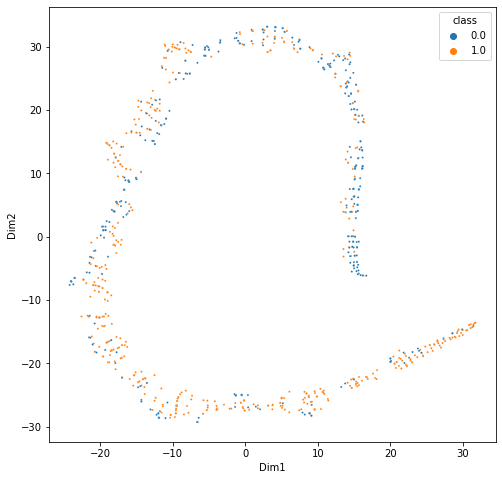

1550 40


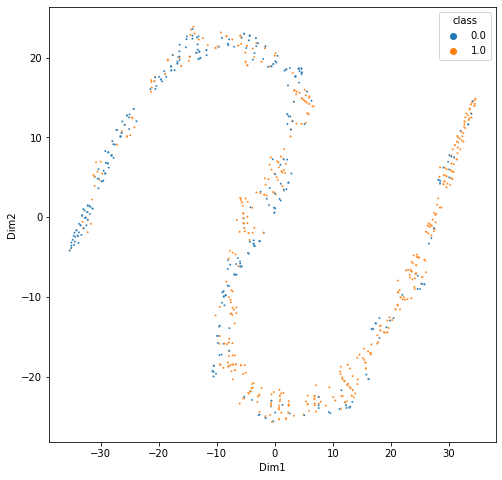

1550 45


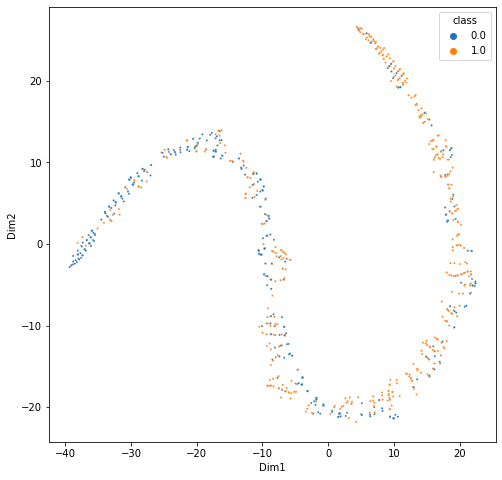

1550 50


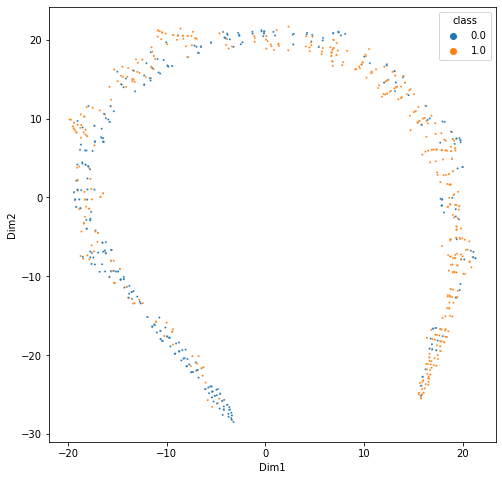

1650 5


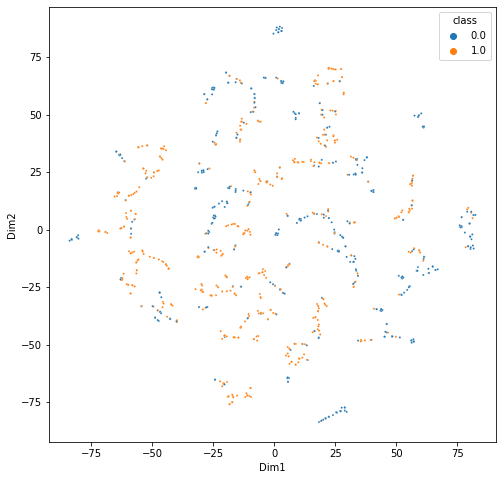

1650 10


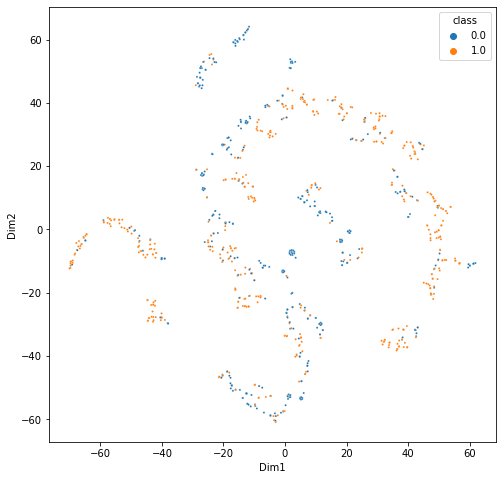

1650 15


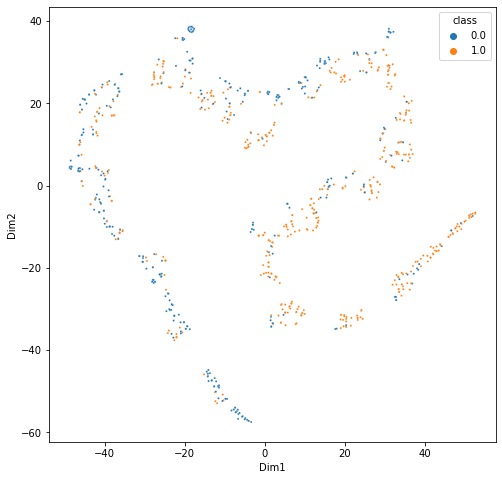

1650 20


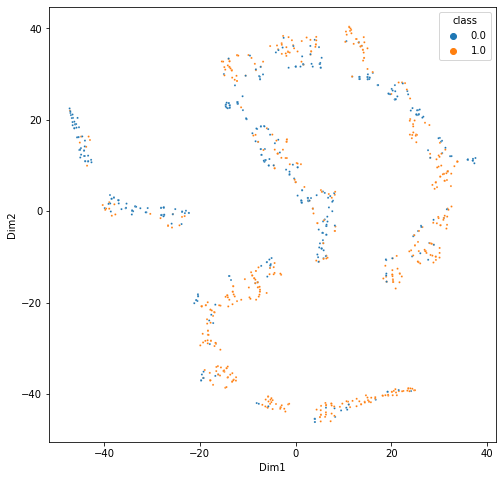

1650 25


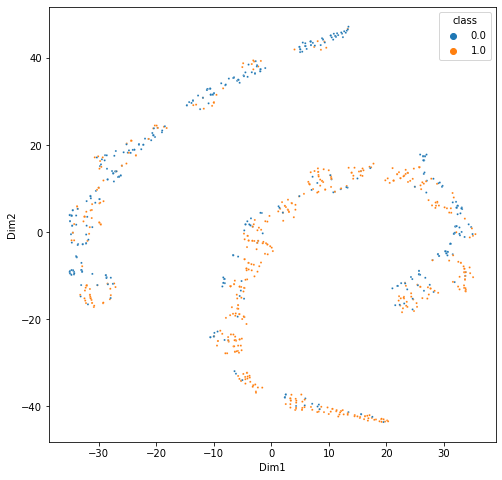

1650 30


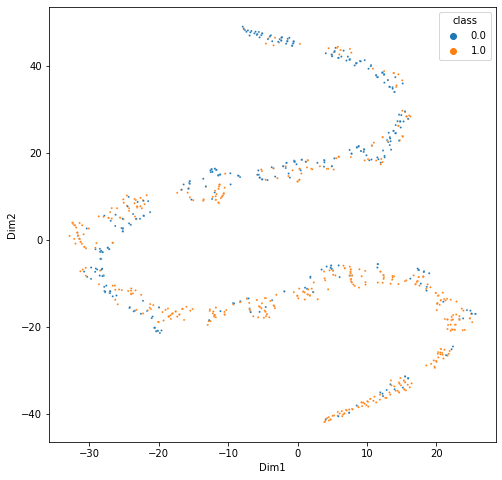

1650 35


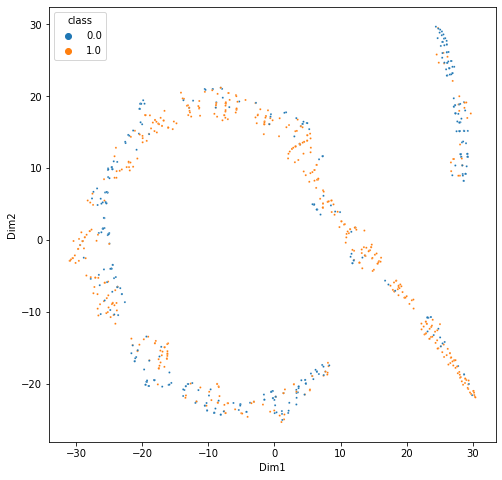

1650 40


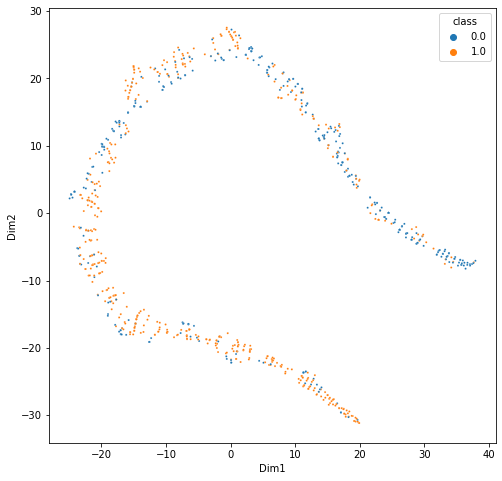

1650 45


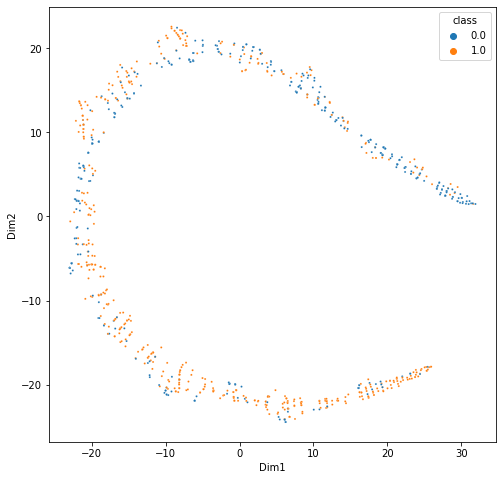

1650 50


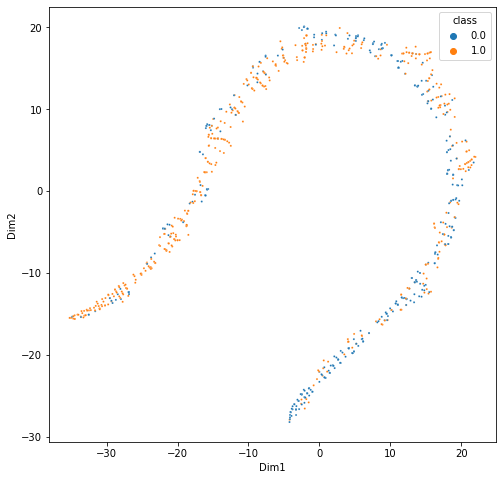

1750 5


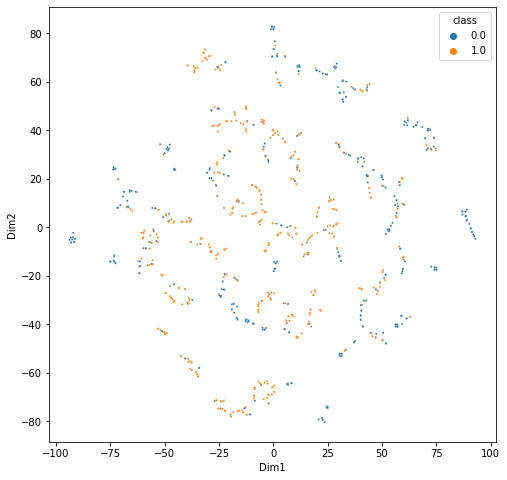

1750 10


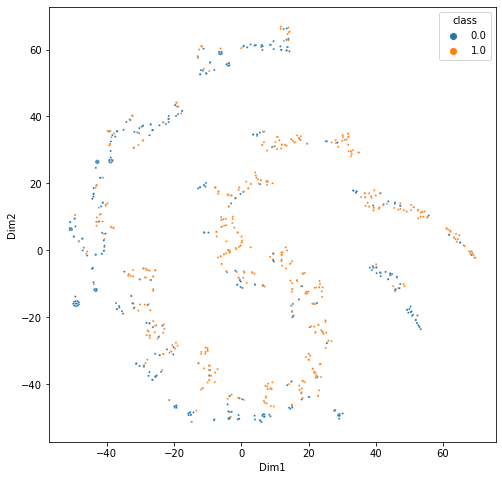

1750 15


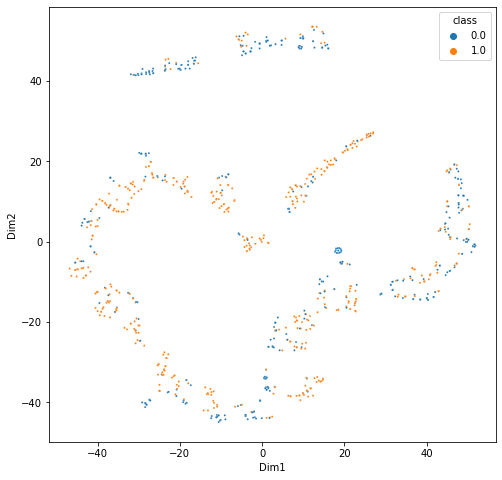

1750 20


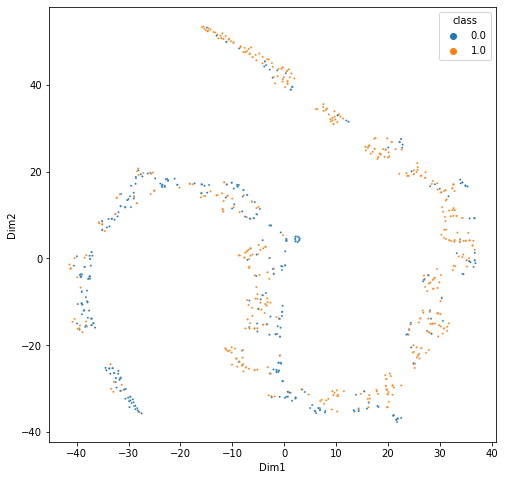

1750 25


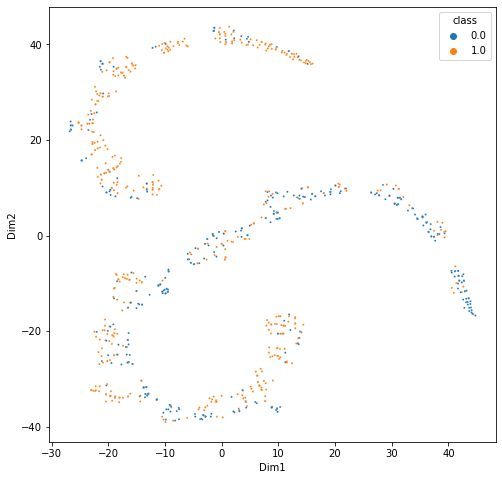

1750 30


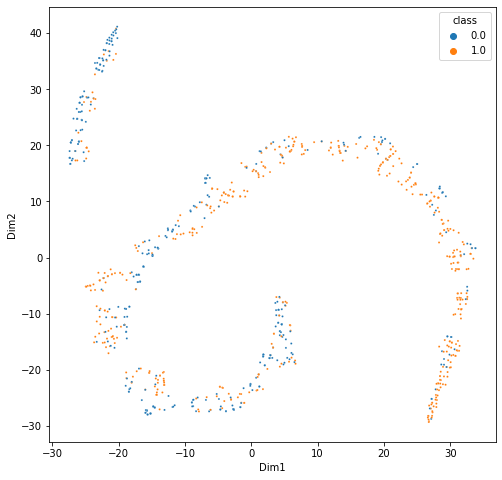

1750 35


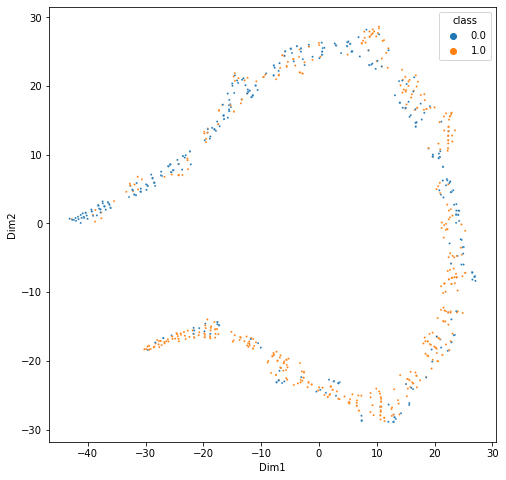

1750 40


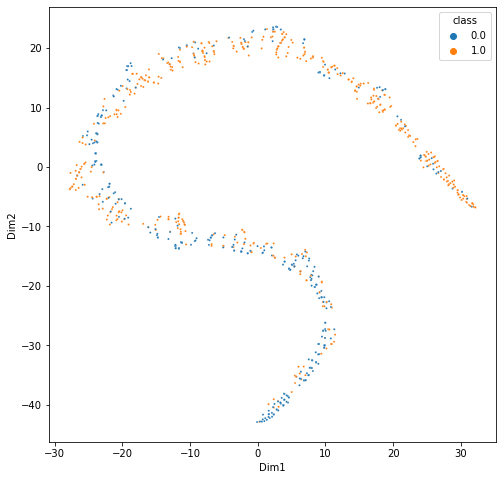

1750 45


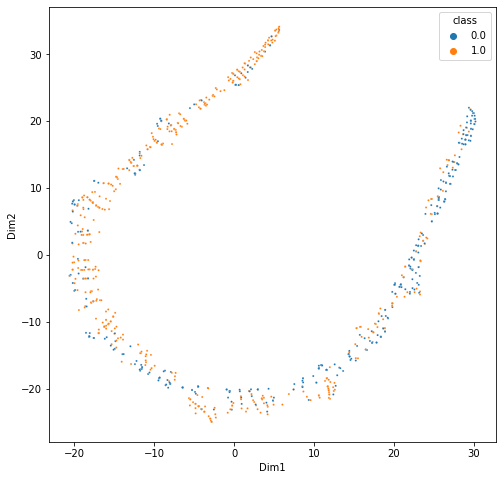

1750 50


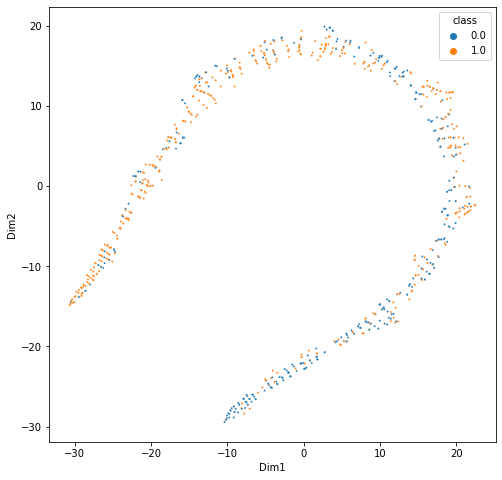

1850 5


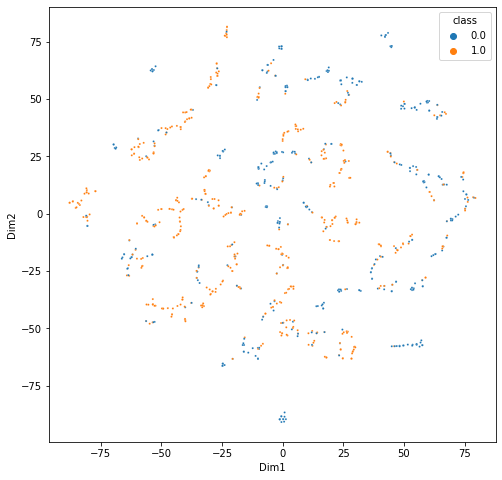

1850 10


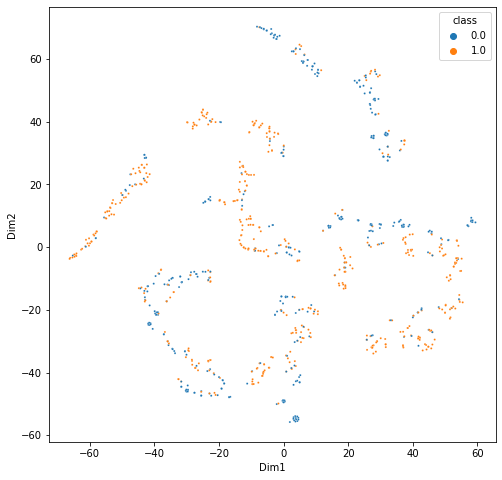

1850 15


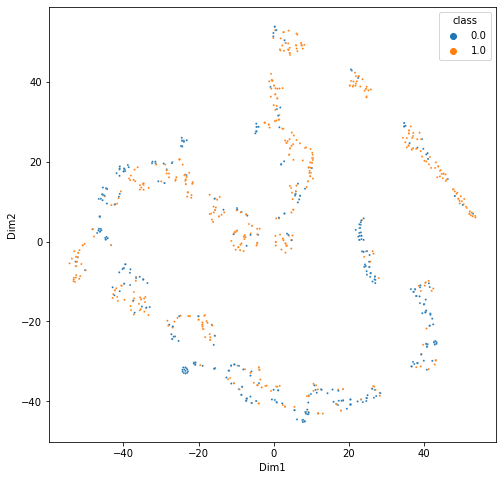

1850 20


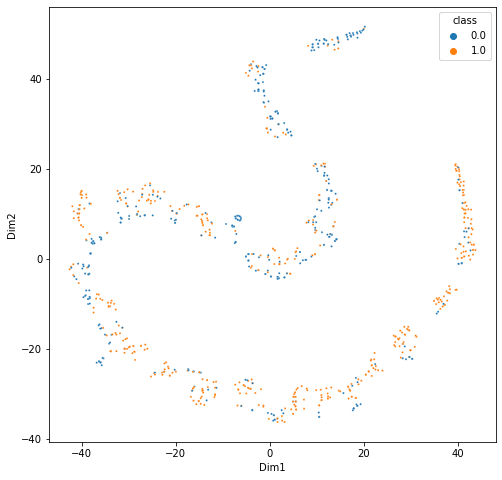

1850 25


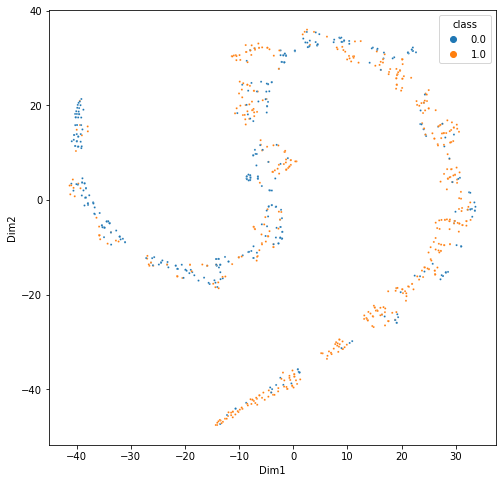

1850 30


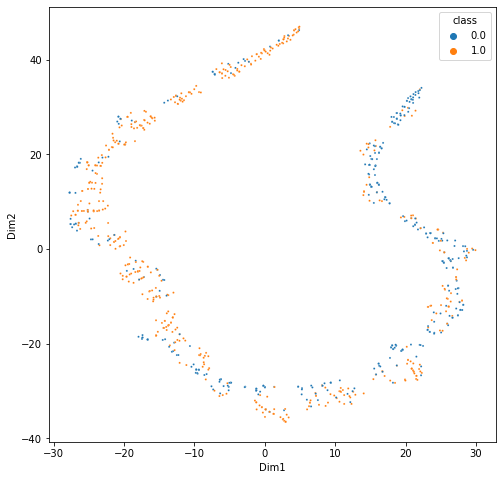

1850 35


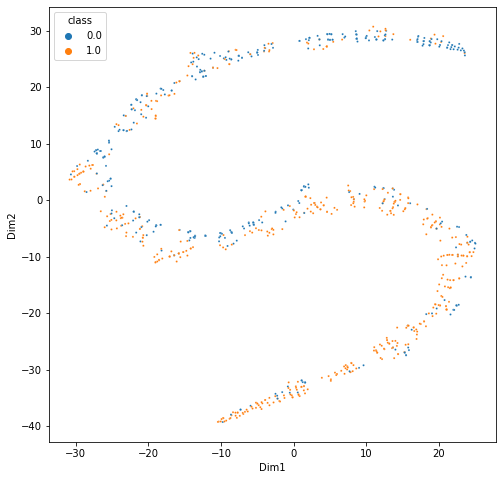

1850 40


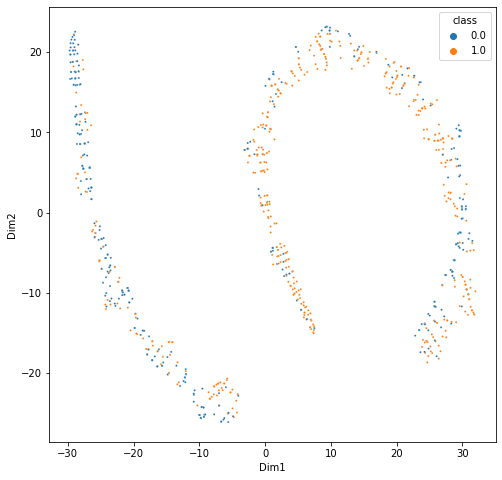

1850 45


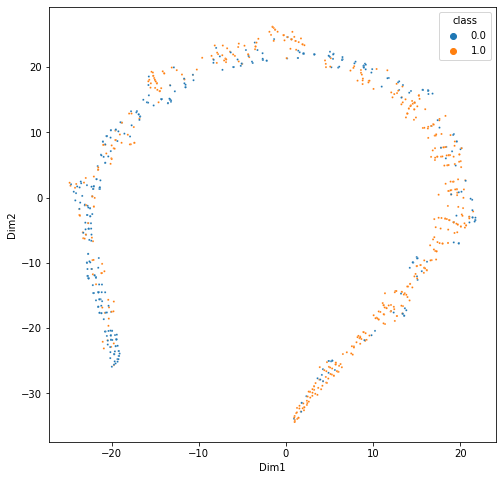

1850 50


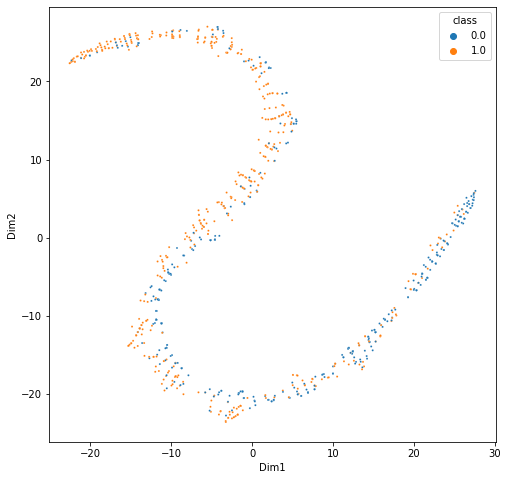

1950 5


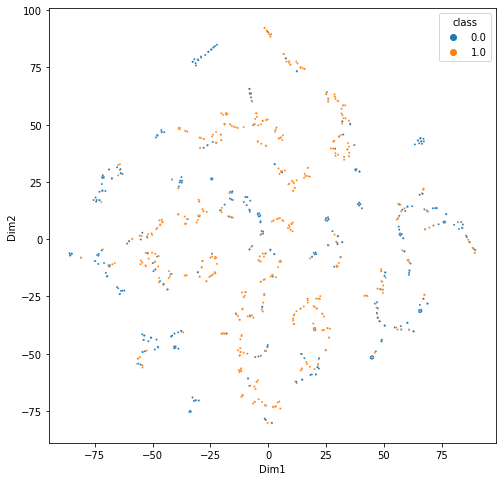

1950 10


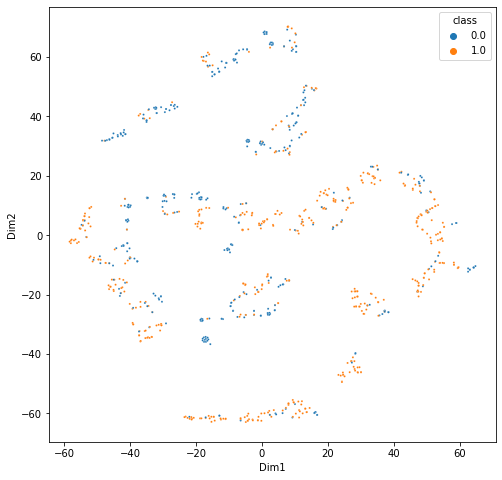

1950 15


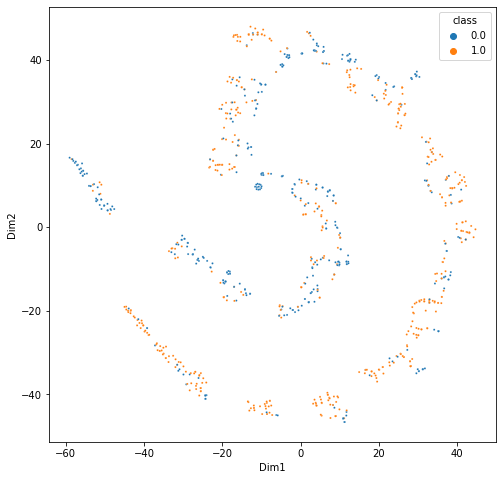

1950 20


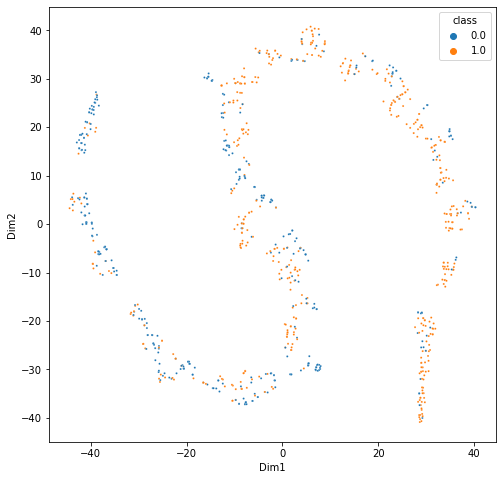

1950 25


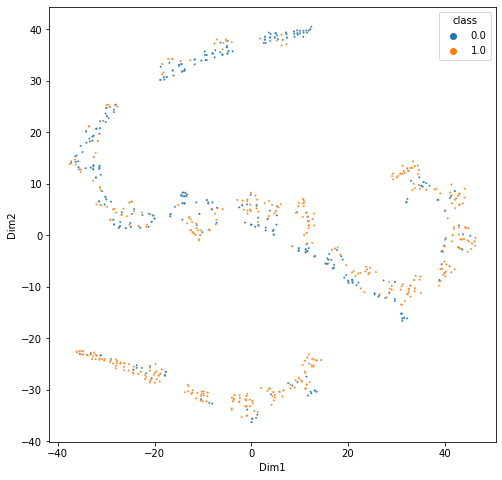

1950 30


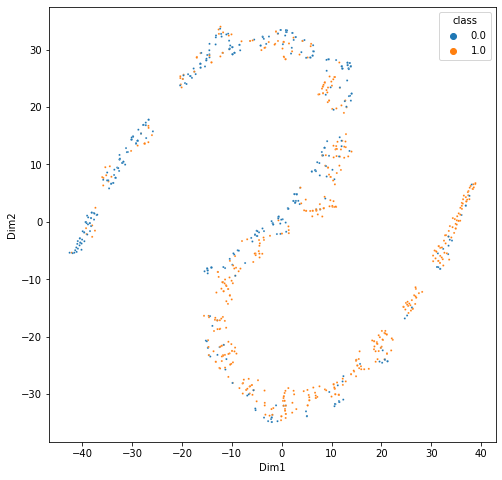

1950 35


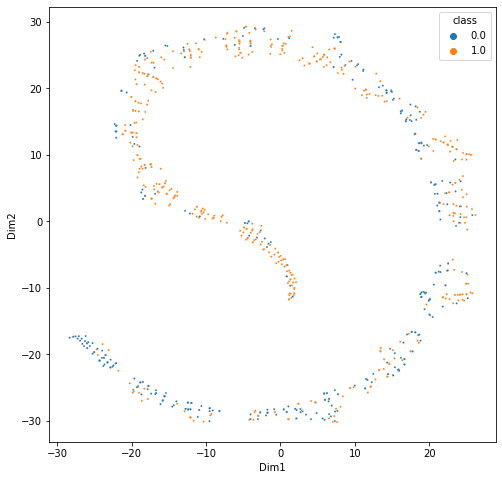

1950 40


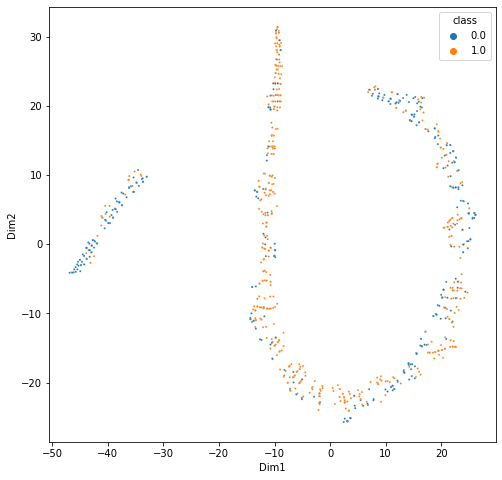

1950 45


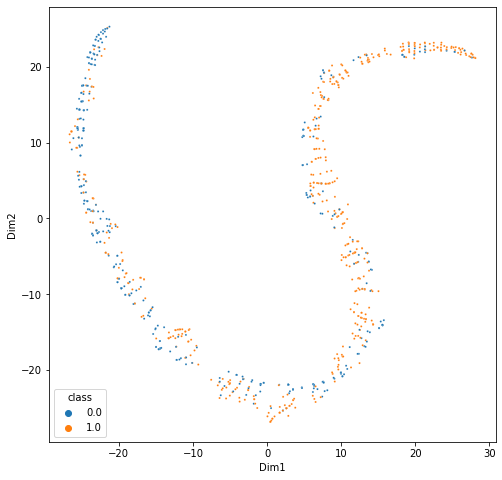

1950 50


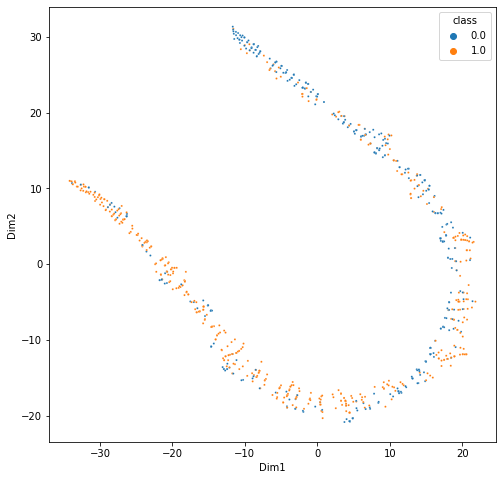

2050 5


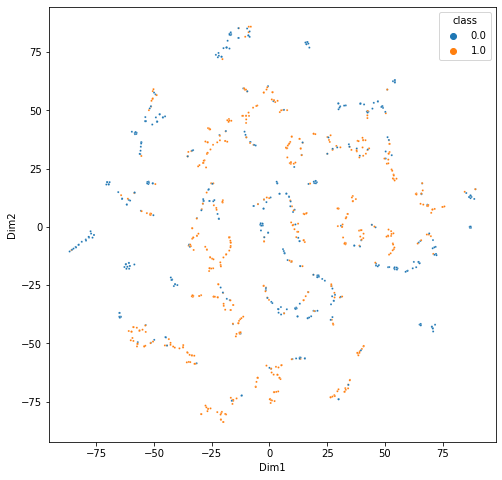

2050 10


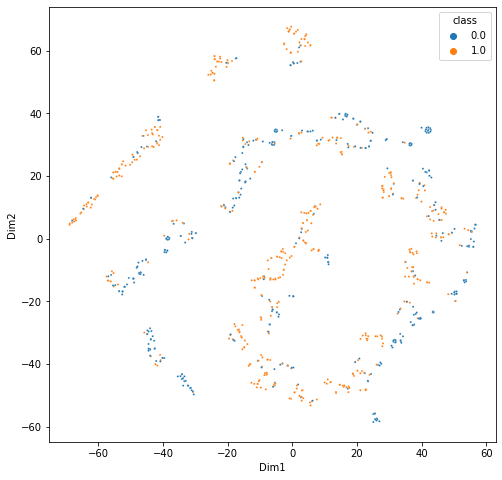

2050 15


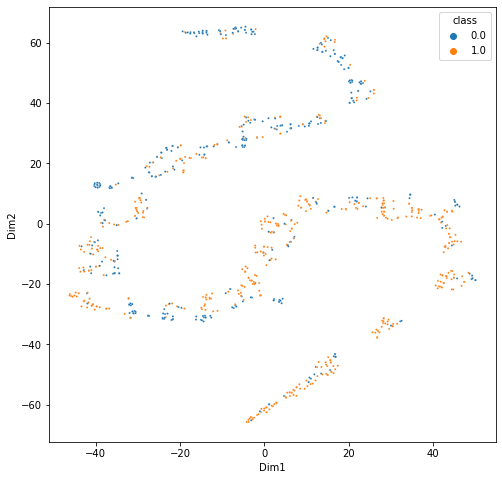

2050 20


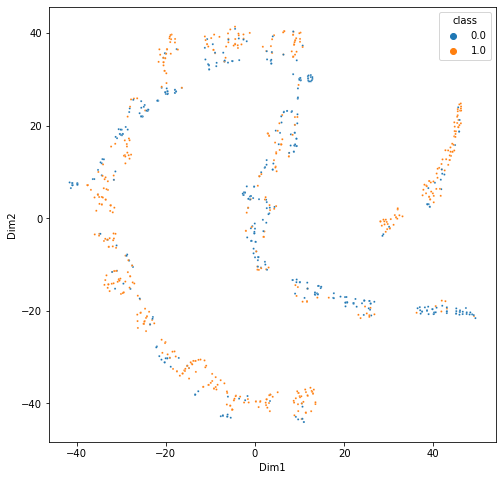

2050 25


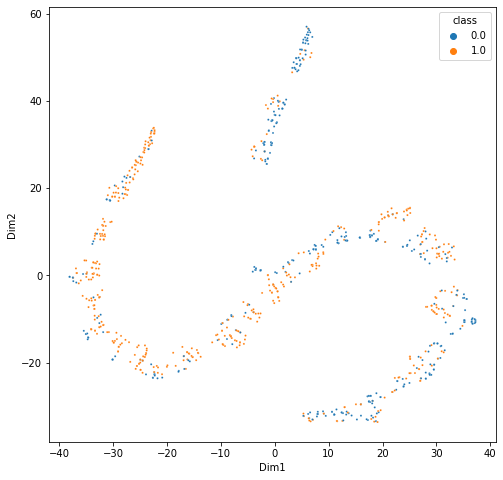

2050 30


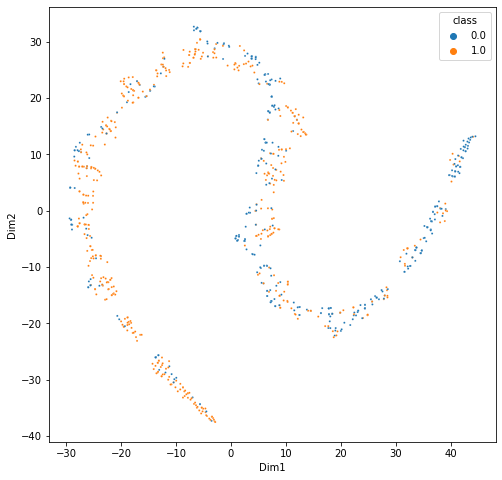

2050 35


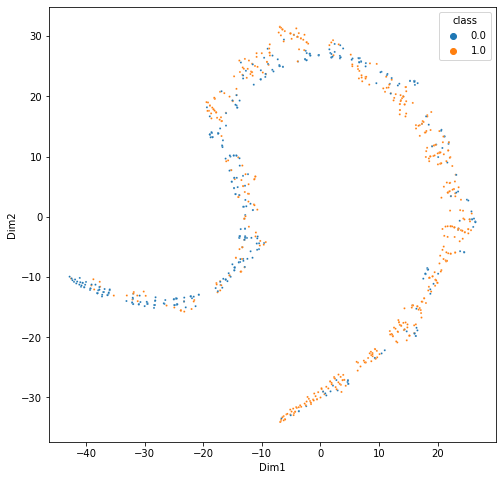

2050 40


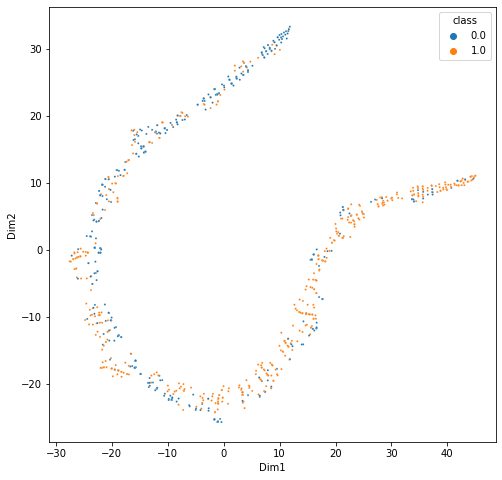

2050 45


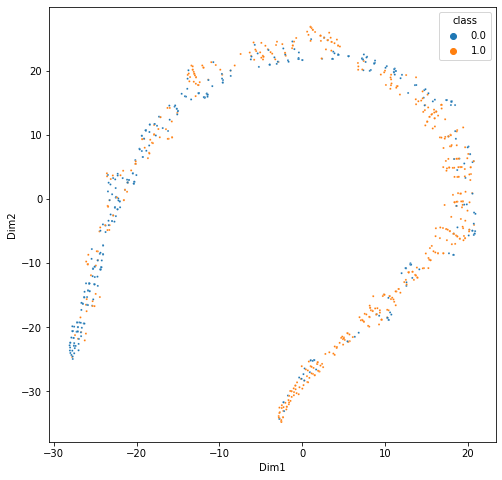

2050 50


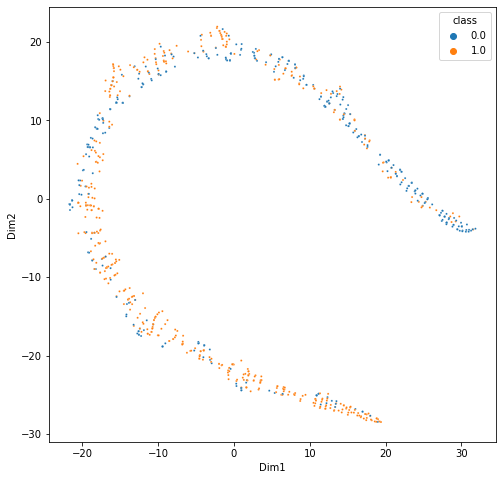

2150 5


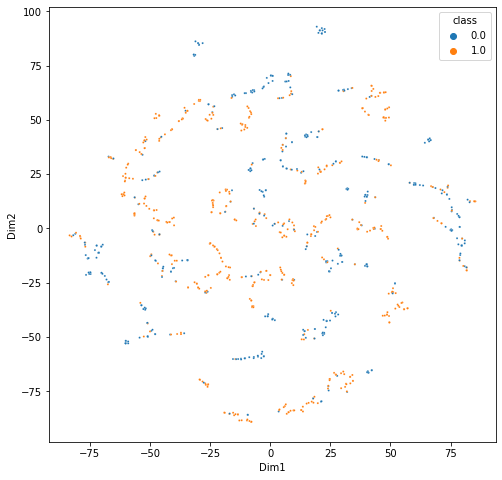

2150 10


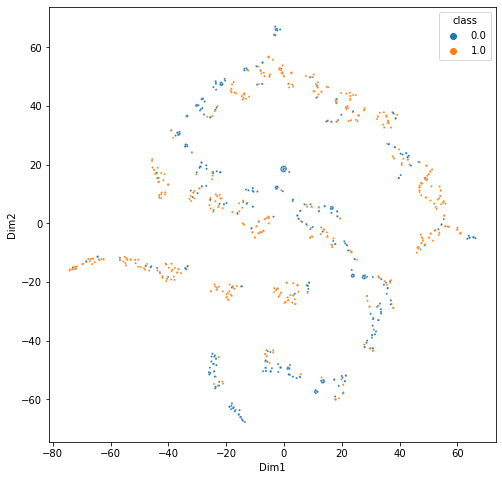

2150 15


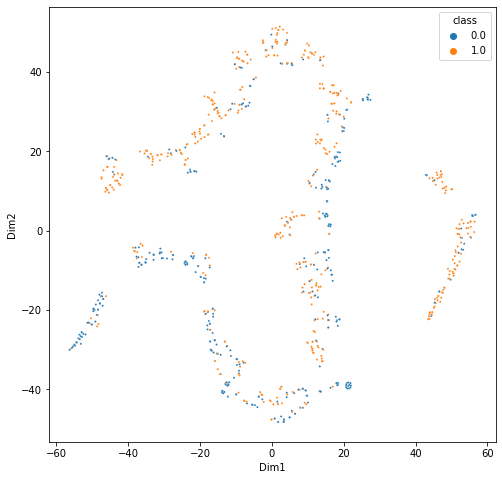

2150 20


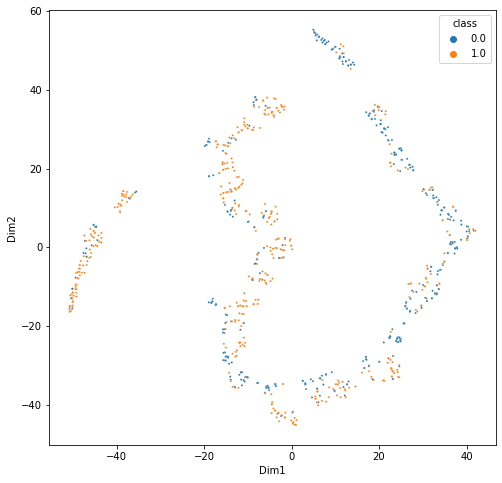

2150 25


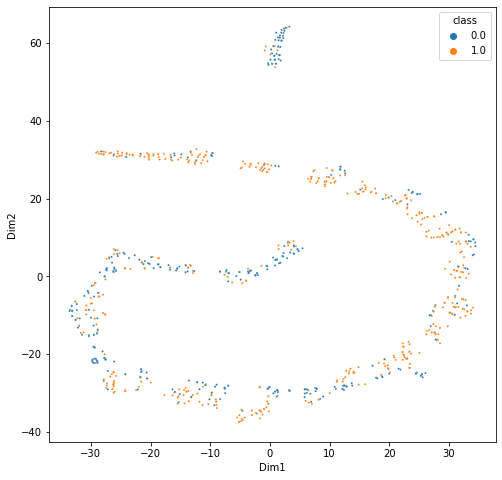

2150 30


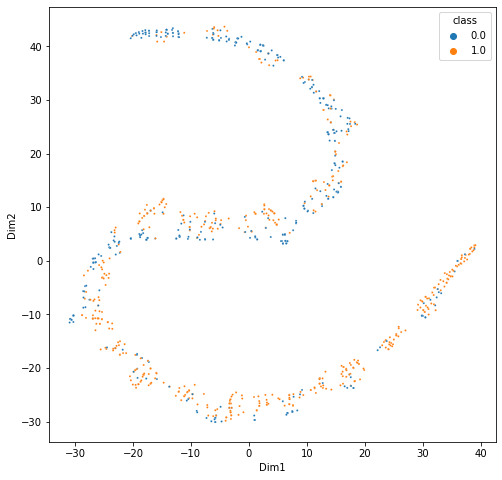

2150 35


KeyboardInterrupt: 

In [9]:
df = pd.read_csv('heart.csv')
'''
The features in the data set incluses
    Age: age of the patient [years]
    Sex: sex of the patient [1: Male, 0: Female]
    ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
    RestingBP: resting blood pressure [mm Hg]
    Cholesterol: serum cholesterol [mm/dl]
    FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
    RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality 
                (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable 
                or definite left ventricular hypertrophy by Estes' criteria]
    MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
    ExerciseAngina: exercise-induced angina [1: Yes, 0: No]
    Oldpeak: oldpeak = ST [Numeric value measured in depression]
    ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
    HeartDisease: output class [1: heart disease, 0: Normal]
'''
df.info()
df.head(10)
new_df = pd.DataFrame(columns=['Age','Sex',	'ChestPainType_TA','ChestPainType_ATA','ChestPainType_ASY',
                            'ChestPainType_NAP','RestingBP','Cholesterol','FastingBS','RestingECG_Normal',
                            'RestingECG_ST','RestingECG_LVH','MaxHR','ExerciseAngina','Oldpeak','ST_Slope_Up',
                            'ST_Slope_Flat','ST_Slope_Down','HeartDisease'])
new_df['Age']=df['Age']
new_df['Sex']=df['Sex']
new_df['ChestPainType_TA']=df['ChestPainType']
new_df['ChestPainType_ATA']=df['ChestPainType']
new_df['ChestPainType_ASY']=df['ChestPainType']
new_df['ChestPainType_NAP']=df['ChestPainType']
new_df['RestingBP']=df['RestingBP']
new_df['Cholesterol']=df['Cholesterol']
new_df['FastingBS']=df['FastingBS']
new_df['RestingECG_Normal']=df['RestingECG']
new_df['RestingECG_ST']=df['RestingECG']
new_df['RestingECG_LVH']=df['RestingECG']
new_df['MaxHR']=df['MaxHR']
new_df['ExerciseAngina']=df['ExerciseAngina']
new_df['Oldpeak']=df['Oldpeak']
new_df['ST_Slope_Up']=df['ST_Slope']
new_df['ST_Slope_Flat']=df['ST_Slope']
new_df['ST_Slope_Down']=df['ST_Slope']
new_df['HeartDisease']=df['HeartDisease']

new_df['Sex'].replace(['M','F'],[1.0, 0.0], inplace = True)
new_df['ChestPainType_TA'].replace(['TA','ATA','ASY','NAP'],[1.0, 0.0, 0.0, 0.0], inplace = True)
new_df['ChestPainType_ATA'].replace(['TA','ATA','ASY','NAP'],[0.0, 1.0, 0.0, 0.0], inplace = True)
new_df['ChestPainType_ASY'].replace(['TA','ATA','ASY','NAP'],[0.0, 0.0, 0.1, 0.0], inplace = True)
new_df['ChestPainType_NAP'].replace(['TA','ATA','ASY','NAP'],[0.0, 0.0, 0.0, 1.0], inplace = True)
new_df['RestingECG_Normal'].replace(['Normal','ST','LVH'],[1.0, 0.0, 0.0], inplace = True)
new_df['RestingECG_ST'].replace(['Normal','ST','LVH'],[0.0, 1.0, 0.0], inplace = True)
new_df['RestingECG_LVH'].replace(['Normal','ST','LVH'],[0.0, 0.0, 1.0], inplace = True)
new_df['ExerciseAngina'].replace(['Y','N'],[1.0, 0.0], inplace = True)
new_df['ST_Slope_Up'].replace(['Up','Flat','Down'],[1.0, 0.0, 0.0], inplace = True)
new_df['ST_Slope_Flat'].replace(['Up','Flat','Down'],[0.0, 1.0, 0.0], inplace = True)
new_df['ST_Slope_Down'].replace(['Up','Flat','Down'],[0.0, 0.0, 1.0], inplace = True)

# new_df.info()
new_df.head(10)
# print(new_df)

new_df.to_csv('heart_data_addressed.csv')

dataset= new_df.drop(['Age','Sex','ChestPainType_TA','ChestPainType_NAP','RestingBP','Cholesterol','FastingBS',
                            'RestingECG_Normal','RestingECG_ST','RestingECG_LVH','ST_Slope_Down'], axis=1)
y_true = dataset['HeartDisease']
x_data = dataset.drop(columns='HeartDisease')
for i in range(250,5000,100):
    for j in range(5,55,5):
        print(i,j)
        tsne = TSNE(verbose = 0, n_components=2, init='random', perplexity = j, n_iter=i, learning_rate=5)
        # X_std = StandardScaler().fit_transform(x_data) 
        X_tsne = tsne.fit_transform(x_data) 
        X_tsne_data = np.vstack((X_tsne.T, y_true)).T 
        df_tsne = pd.DataFrame(X_tsne_data, columns=['Dim1', 'Dim2','class']) 
        df_tsne.head()
        plt.figure(figsize=(8, 8)) 
        sns.scatterplot(data=df_tsne, hue='class', x='Dim1', y='Dim2',s=4) 
        plt.show()

Prediction Assessment

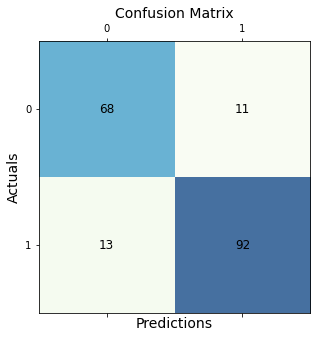

[0.         0.13924051 1.        ] [0.         0.87619048 1.        ] [2 1 0]


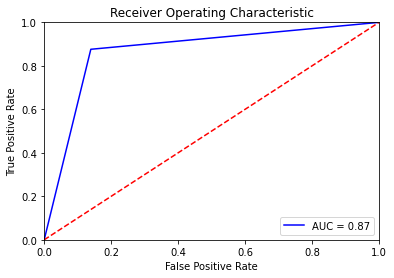

[0.57065217 0.89320388 1.        ] [1.         0.87619048 0.        ]


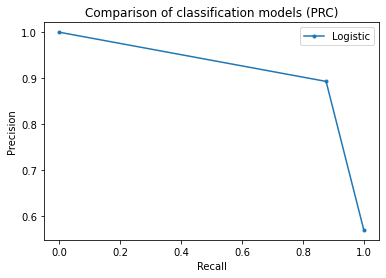

Precision: 0.893
Recall: 0.876
Accuracy: 0.870
F1 Score: 0.885
ROC-AUC Score: 0.868


None
None
